In [1]:
## librerias de transformación de datos 
library(dplyr)
library(tidyverse)
library(scales)
library(purrr)

## librerias para Machine Learning 
library(cluster)
library(dbscan)
library(fpc)
library(mclust)

## librerias para validación de Clusteres
library(clValid)
library(NbClust)

#librerias para visualización de datos 
library(ggplot2)
library(factoextra)
library (corrplot)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr

Warning message:
"package 'tibble' was built under R version 3.4.3"
Conflicts with tidy packages ---------------------------------------------------

filter(): dplyr, stats
lag():    dplyr, stats

Warning message:
"package 'scales' was built under R version 3.4.3"

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor



Attaching package: 'fpc'


The following object is masked from 'package:dbscan':

    dbscan


Package 'mclust' version 5.3

Type 'citation("mclust")' for citing this R package in publications.


Attaching package: 'mclust'


The foll

## Comprensión de los datos

In [3]:
data <- read.csv("C:\\Users\\dcruz\\Documents\\Master en Intelegencia Artificial\\TFM\\Practica\\Datasets\\Consumos Porcentajes VMware.csv", encoding = "latin-1", sep = ";", dec = ",")

In [4]:
head(data)

VMName,RAM,RAM_percentage,RAM_LastAvgUse_Gb_SD,CPUCount,CPU_percentage,CPU_LastAvgUse_MHz_SD,NETWORK_LastInboundAvgUse_Kbps_P95,NETWORK_LastInboundAvgUse_Kbps_SD,NETWORK_LastOutboundAvgUse_Kbps_P95,NETWORK_LastOutboundAvgUse_Kbps_SD
1000095_WINDOWS_SERVER_2012_R2_DATACENTER_64Bits,4,100,1,2,9,331,90,38,62,78
100634_FUNDACION_CIDCA_WIN_2003_32BIT_NEW (8f6e8a9c-c313-4a0a-9ba7-6573eae022d8),24,100,0,12,1,158,0,0,0,1
1006695_WINDOWS_SERVER_2016_DATACENTER_64 (55f438ca-6813-43df-83fa-892ea2c0b78d),4,100,0,2,21,337,0,19,0,1
100854_SERFIN_Contardocloud (07200194-5a6a-4629-9242-d17b265099e0),8,100,0,8,10,585,5,7,7,13
100854_SERFIN_Contardocloud_0501,8,100,0,8,71,5810,34,13,20,9
107479_DEBIAN_6.0.8_64Bits (6af5ec21-3624-4336-a70f-e358e41b1e79),2,100,0,2,0,49,1,784,0,4


## Preparación de los datos 

In [5]:
data  <- data[data$RAM<=128,]
data  <- data[data$CPUCount<=64,]

features <- c("RAM","RAM_percentage","CPUCount","CPU_percentage")


datos <- scale(data[,features])

In [5]:
dim(datos)

[1] 1877    4

In [6]:
head(datos, 10)

,RAM,RAM_percentage,CPUCount,CPU_percentage
1,-0.6299373,0.5132675,-0.6726152,-0.38603518
2,0.2290161,0.5132675,1.1113310,-0.68841934
3,-0.6299373,0.5132675,-0.6726152,0.06754105
4,-0.4581466,0.5132675,0.3977525,-0.34823716
5,-0.4581466,0.5132675,0.3977525,1.95744203
6,-0.7158326,0.5132675,-0.6726152,-0.72621736
7,-0.6299373,0.4304867,-0.3158260,-0.27264112
8,0.2290161,-1.5148624,0.3977525,-0.42383320
9,-0.4581466,0.5132675,-0.3158260,-0.49942924
10,-0.4581466,0.5132675,-0.3158260,-0.42383320


## Reducción de dimensionalidad

* ### Analisis principal de componentes

In [7]:
head(data[features])

RAM,RAM_percentage,CPUCount,CPU_percentage
4,100,2,9
24,100,12,1
4,100,2,21
8,100,8,10
8,100,8,71
2,100,2,0


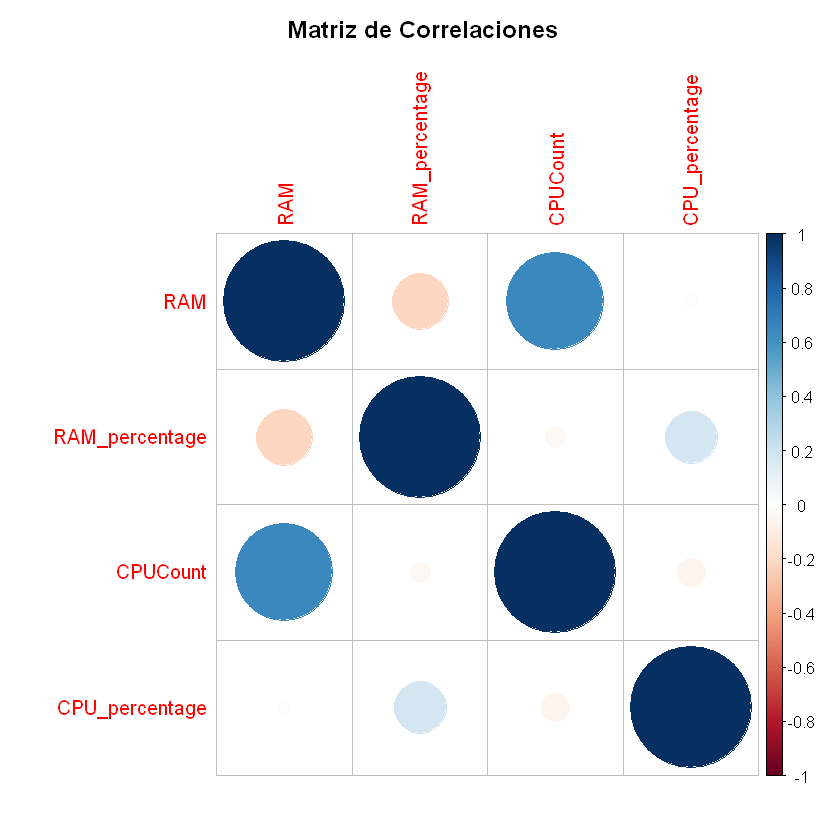

In [8]:
corr <- cor(datos)
corrplot(corr, method= "circle", title="\n\n Matriz de Correlaciones")

In [9]:
datos_acp <- prcomp(datos, scale = T)
a<-summary(datos_acp)

a

Importance of components%s:
                          PC1    PC2    PC3     PC4
Standard deviation     1.3050 1.0726 0.9130 0.55945
Proportion of Variance 0.4257 0.2876 0.2084 0.07825
Cumulative Proportion  0.4257 0.7134 0.9217 1.00000

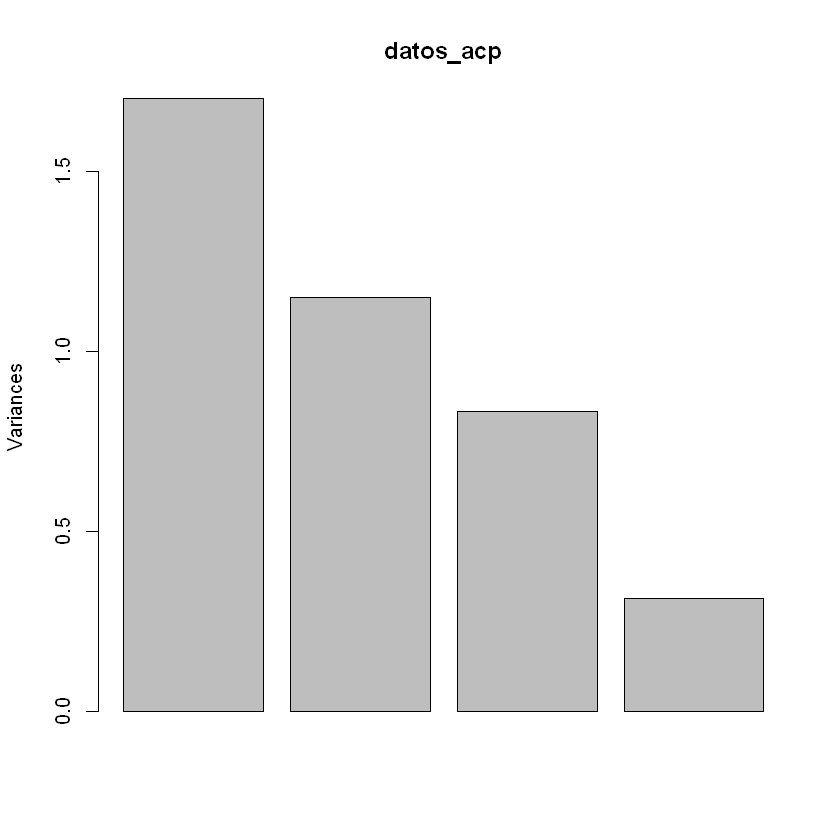

In [10]:
plot(datos_acp, )

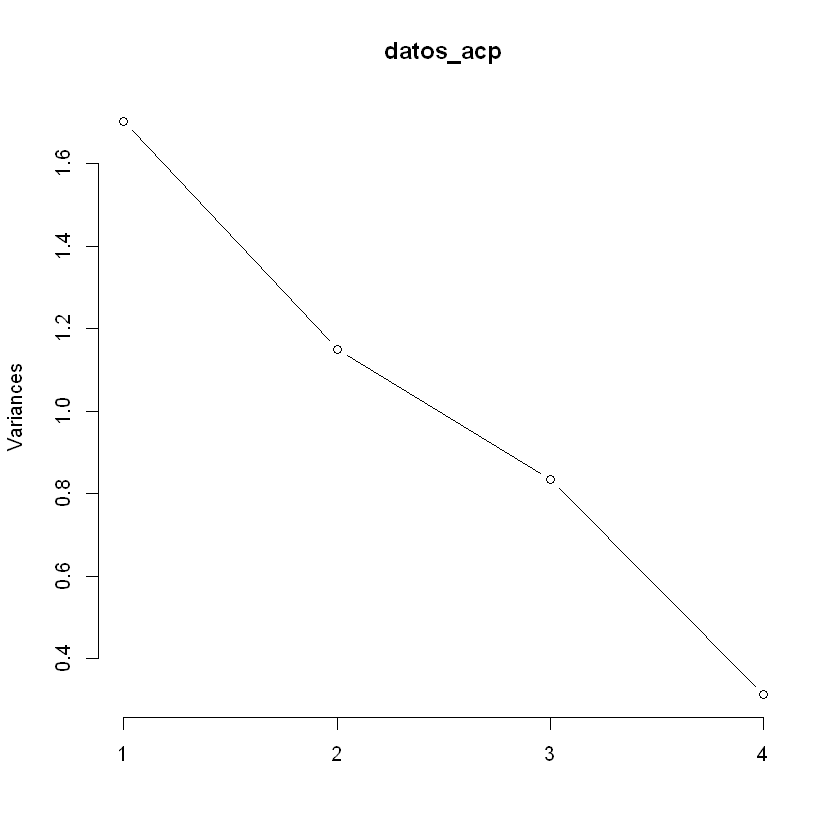

In [11]:
plot(datos_acp, type = "lines")

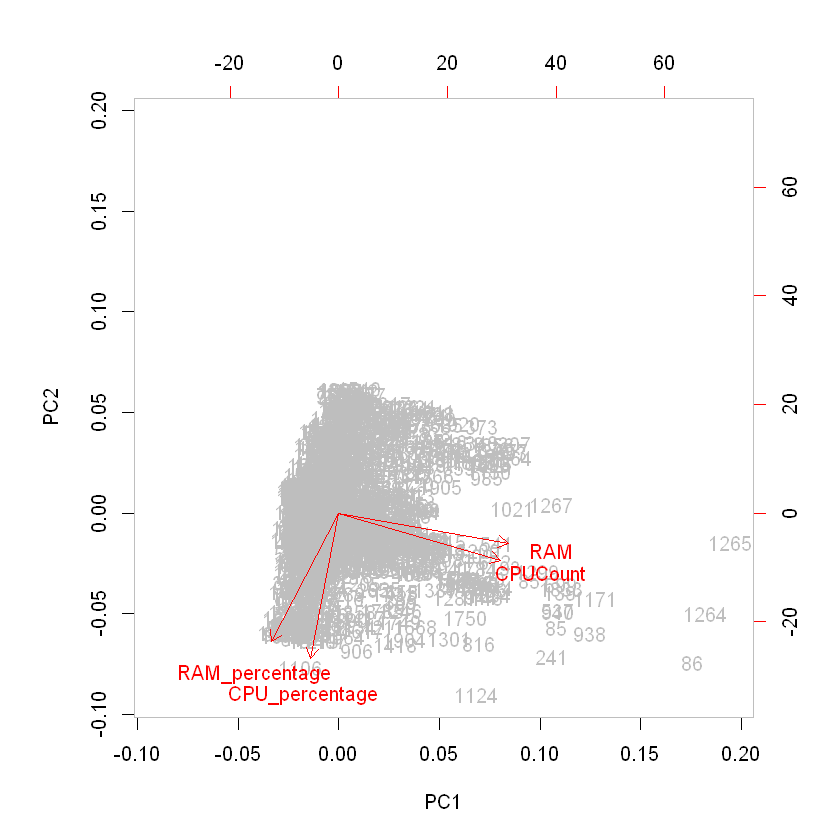

In [12]:
biplot(datos_acp, col = c("gray", "red"))

## Estudio de la tendencia de clustering

Antes de aplicar un método de clustering a los datos es conveniente evaluar si hay indicios de que realmente existe algún tipo de agrupación en ellos. A este proceso se le conoce como assessing cluster tendecy y puede llevarse a cabo mediante test estadísticos (Hopkins statistic) o de forma visual (Visual Assessment of cluster Tendency).

* ### Hopkins statistics

El estadístico Hopkins permite evaluar la tendencia de clustering de un conjunto de datos mediante el cálculo de la probabilidad de que dichos datos procedan de una distribución uniforme, es decir, estudia la distribución espacial aleatoria de las observaciones.

In [13]:
library(clustertend)
set.seed(321)

# Estadístico H para el set de datos iris
hopkins(data = datos, n = nrow(datos) - 1)

$H
[1] 0.05416248

El estadistico de Hopkins tiene un valor aproximado a 0.05. Como este valor es muy cercano a 0, se puede interpretarm que los datos no responden a una ditribución uniforme y es posible aplicar tecnicas de clustering para encontrar agrupaciones naturales en los datos

* ### Visual Assessment of cluster Tendency (VAT)

VAT es método que permite evaluar visualmente si los datos muestran indicios de algún tipo de agrupación. Se representa gráficamente la matriz de distancias ordenada, empleando un gradiente de color para el valor de las distancias. Si existen agrupaciones subyacentes en los datos se forma un patrón de bloques cuadrados.

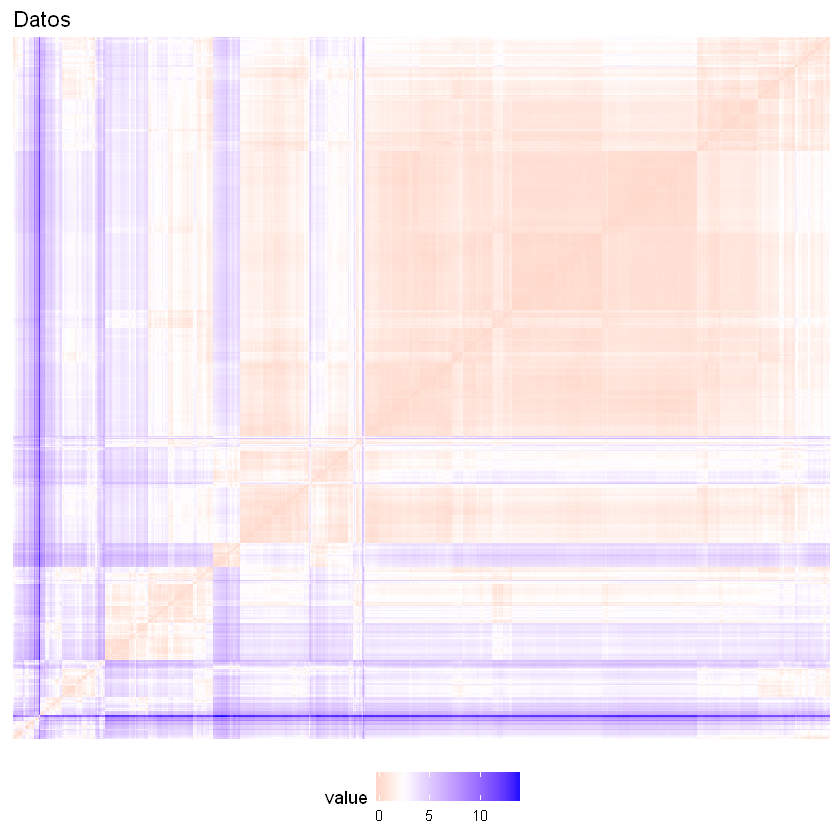

In [14]:
dist_datos <- dist(datos, method = "euclidean")
p1 <- fviz_dist(dist.obj = dist_datos, show_labels = FALSE) +
      labs(title = "Datos") + theme(legend.position = "bottom")
p1

El método VAT confirma que en el set de datos sí hay una estructura de grupos, por lo que es recomendable aplicar tecnicas de clustering para obtenerlos 

## Modelado

In [15]:
## DataFrame para alamacenar los resultados de cata una de las tecnicas de clustering 

results <- data.frame(Algorithm=character(),
                 Strategy=character(), 
                 Distance=character(), 
                 Clusters=numeric(), 
                 Silhouette_Score=numeric(),
                 Cluster_Elements= character(),        
                 stringsAsFactors=FALSE) 

results


add_results <- function(results, algorithm, strategy="", distance="euclidean", stats){
  
   return ( results %>% add_row(Algorithm = algorithm, 
                      Strategy= strategy, 
                      Distance=distance, 
                      Clusters = stats$cluster.number , 
                      Silhouette_Score=stats$avg.silwidth,
                      Cluster_Elements=paste(sort(stats$cluster.size, decreasing = T),collapse="/")))
}

Algorithm,Strategy,Distance,Clusters,Silhouette_Score,Cluster_Elements


* ### 1 Algoritmo K-MEANS

Decidir cuál es el método de clustering más adecuado para un determinado set de datos es un proceso complejo ya que se tienen que analizar uno a uno múltiples índices, estadísticos y parámetros (número de clusters, homogeneidad, separación, significancia…). El paquete clValid agiliza el proceso ofreciendo la posibilidad de comparar, de forma simultánea, múltiples algoritmos de clustering en una única función.

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


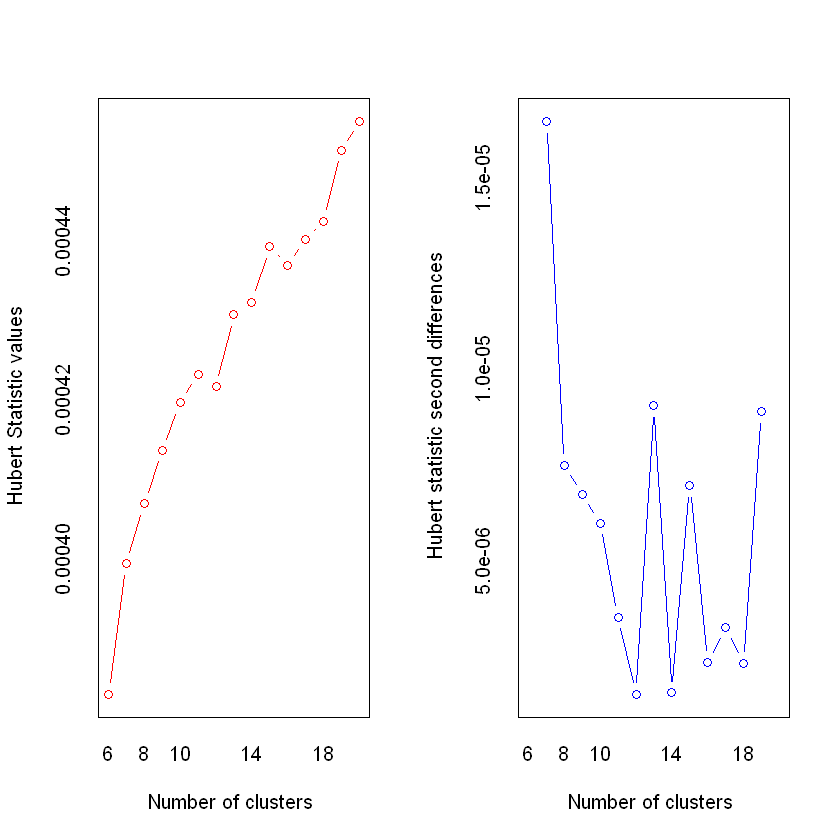

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 6 as the best number of clusters 
* 11 proposed 7 as the best number of clusters 
* 1 proposed 16 as the best number of clusters 
* 1 proposed 18 as the best number of clusters 
* 1 proposed 19 as the best number of clusters 
* 3 proposed 20 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  7 
 
 
******************************************************************* 
Among all indices: 
* 2 proposed  0 as the best n

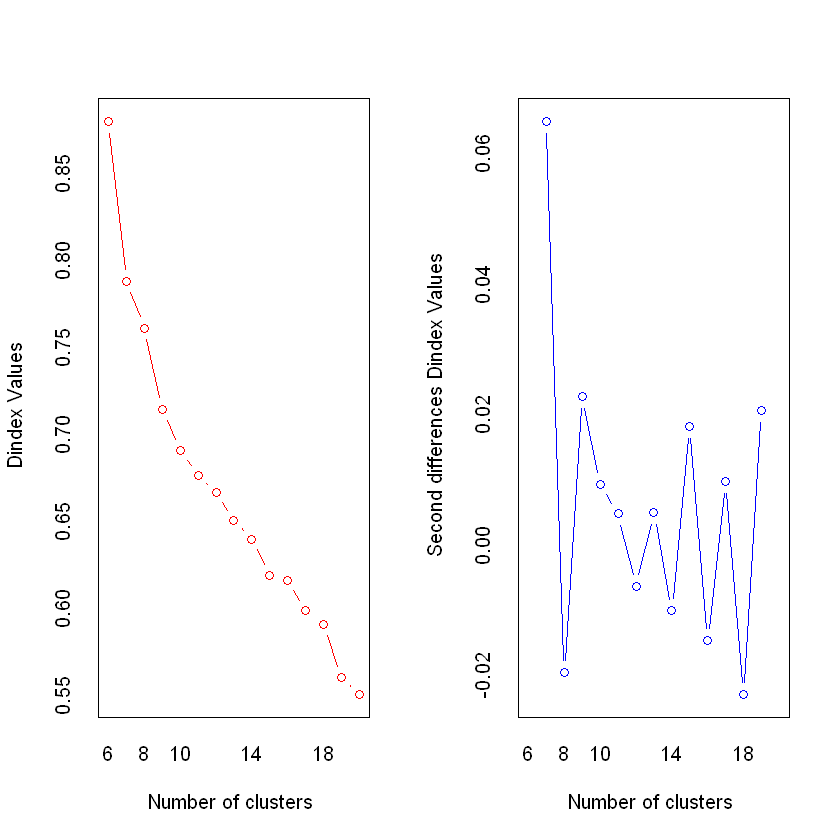

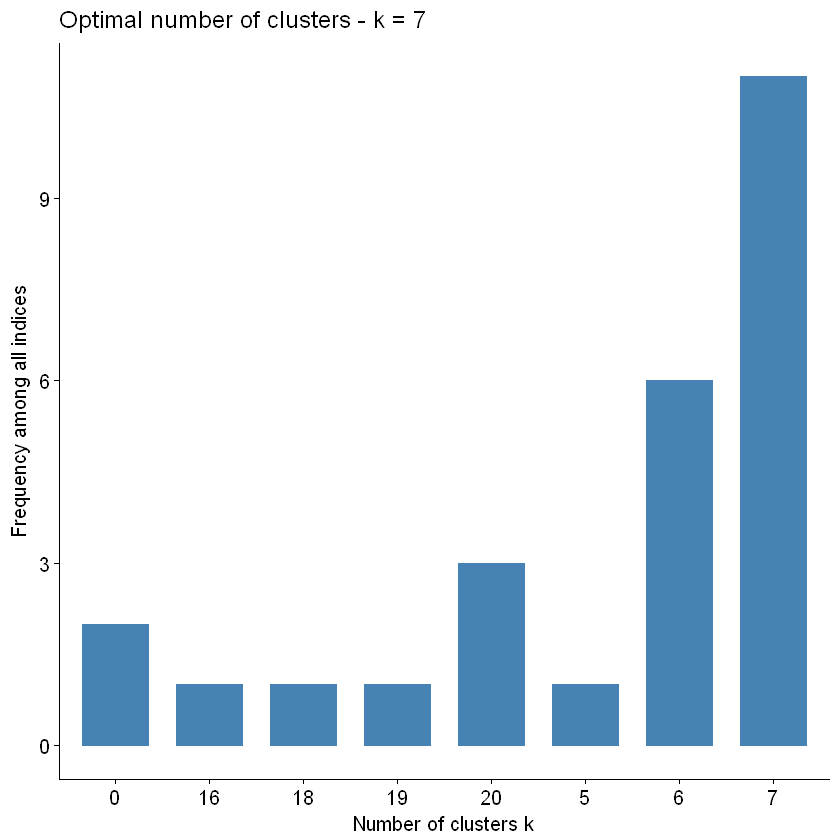

In [16]:
numero_clusters <- NbClust(data = datos, distance = "euclidean", min.nc = 6,
                           max.nc = 20, method = "kmeans", index = "all")

fviz_nbclust(numero_clusters)

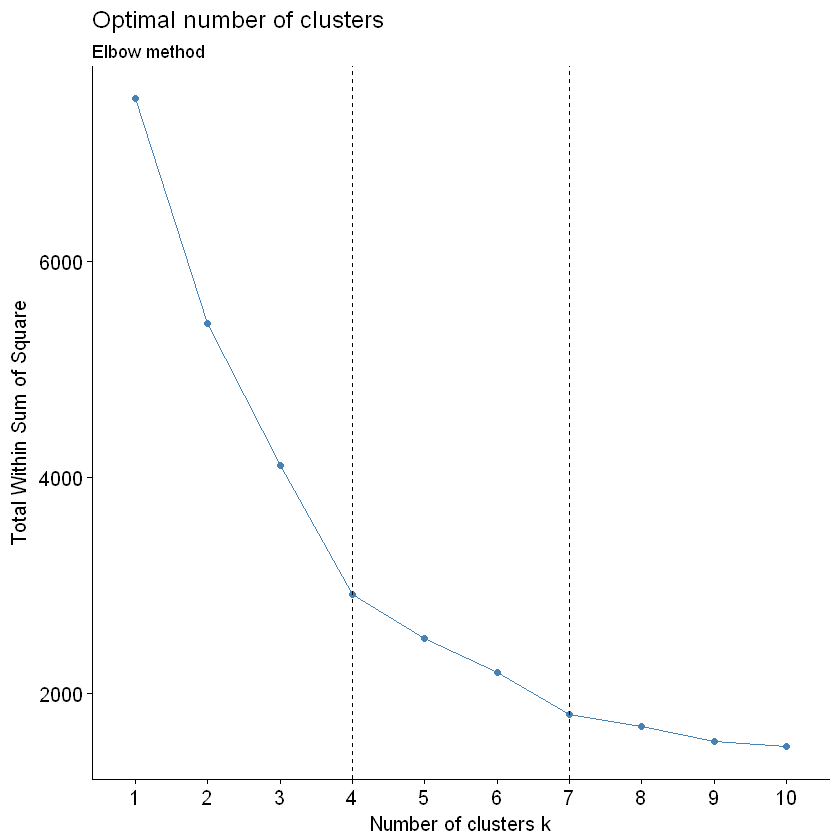

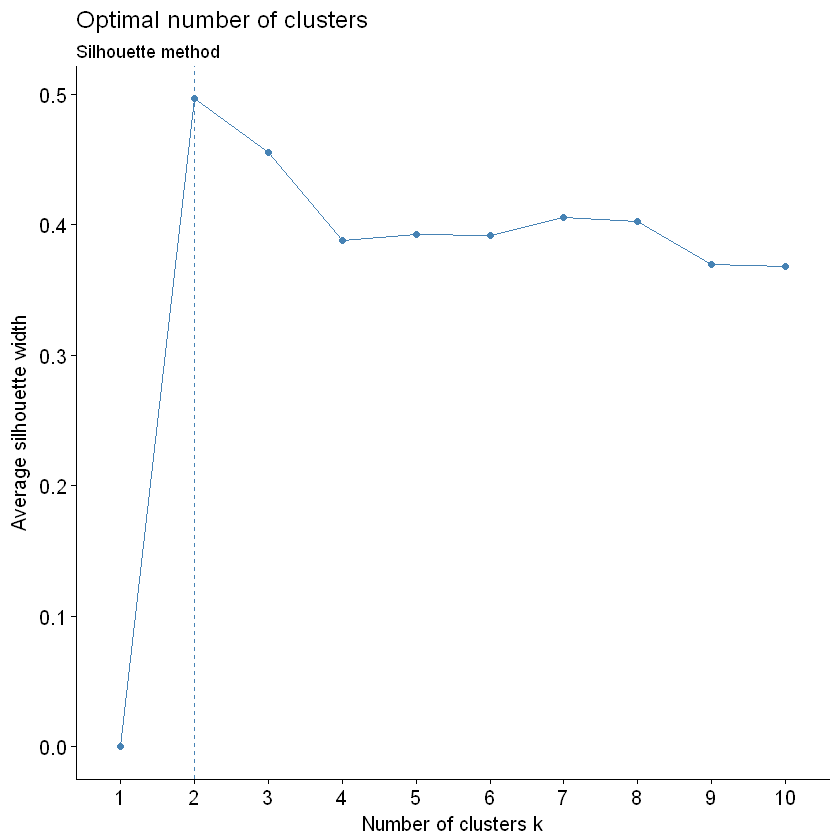

In [17]:
# Elbow method
fviz_nbclust(datos, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
    geom_vline(xintercept = 7, linetype = 2)+
  labs(subtitle = "Elbow method")

# Silhouette method
fviz_nbclust(datos, kmeans, method = "silhouette", nboot = 100)+
  labs(subtitle = "Silhouette method")

# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
#set.seed(123)
#fviz_nbclust(datos, kmeans, nstart = 25,  method = "gap_stat", nboot = 50, verbose= F)+
#  labs(subtitle = "Gap statistic method")

[1] 1805.68



  1   2   3   4   5   6   7 
 49 123  57 878 217 273 280 

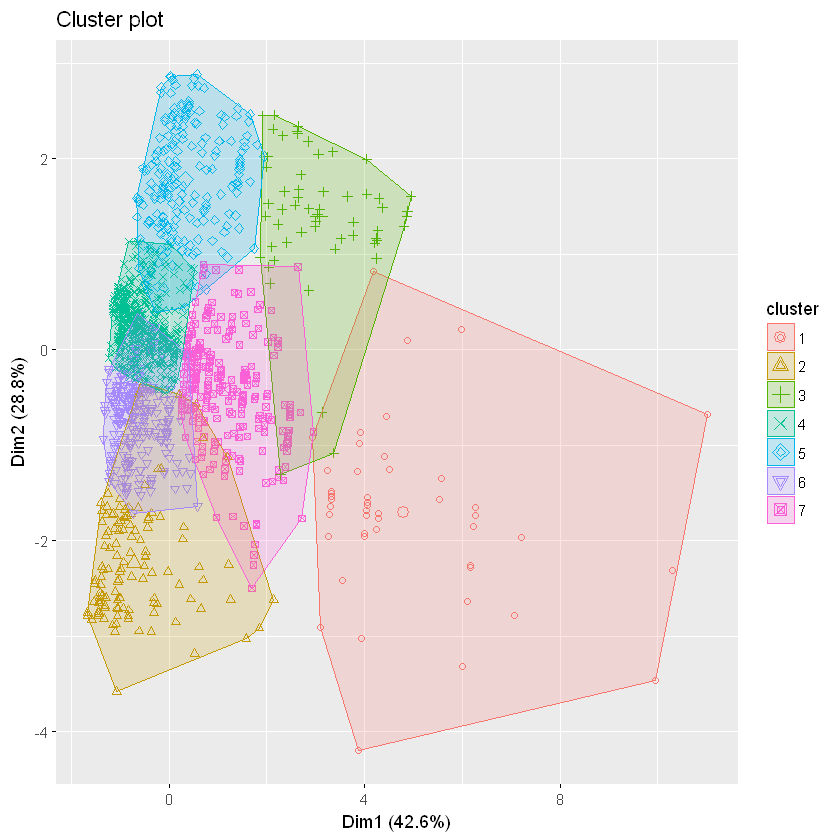

In [18]:
km.res <- kmeans(datos, 7, nstart = 50)
fviz_cluster(km.res, data = datos, geom = "point")
print(km.res$tot.withinss)

dd <- dist(datos, method = "euclidean")
km_stats <- cluster.stats(dd, km.res$cluster)
table(km.res$cluster)

## Validación de la Calidad de los Cluster

* ### Ancho de la Silueta

Silhouette of 1877 units in 7 clusters from silhouette.default(x = km.res$cluster, dist = dist(datos)) :
 Cluster sizes and average silhouette widths:
       49       123        57       878       217       273       280 
0.2442685 0.3447321 0.3604635 0.5185873 0.4077108 0.3451969 0.1712011 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1909  0.2650  0.4467  0.4054  0.5787  0.6708 

  cluster size ave.sil.width
1       1   49          0.24
2       2  123          0.34
3       3   57          0.36
4       4  878          0.52
5       5  217          0.41
6       6  273          0.35
7       7  280          0.17


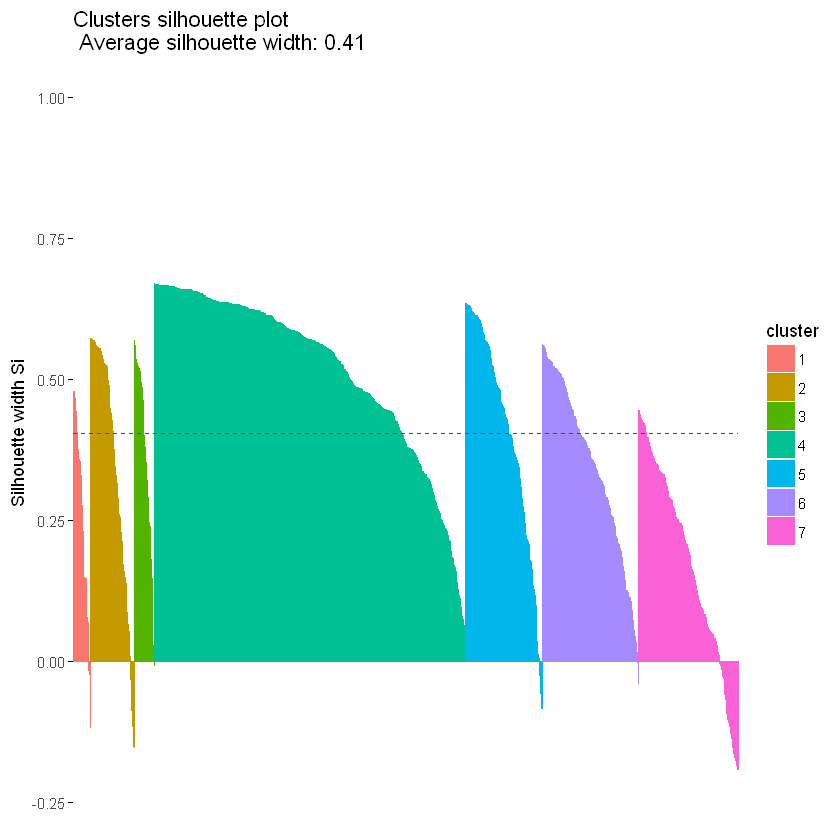

In [19]:
#km.res <- kmeans(datos, 7, nstart = 50)
sil.km <- silhouette(km.res$cluster, 
                     dist(datos))

sil.sum <- summary(sil.km)
sil.sum

fviz_silhouette(sil.km)

* ### Indice de Dunn

In [20]:
km.res <- kmeans(datos, 7, nstart = 50)
dd <- dist(datos, method = "euclidean")
km_stats <- cluster.stats(dd, km.res$cluster)
#km_stats$within.cluster.ss
#km_stats$clus.avg.silwidths
km_stats$dunn

[1] 0.003661477

In [21]:
results<- add_results(results, algorithm="K-means", strategy="", distance="euclidean", km_stats)
results

Algorithm,Strategy,Distance,Clusters,Silhouette_Score,Cluster_Elements
K-means,,euclidean,7,0.4053732,878/280/273/217/123/57/49


* ### 2 Algoritmo Jerarquico Aglomerativo

Con la función **agnes** se puede obtener el coeficiente de aglomeración, que mide la cantidad de estructura de agrupamiento encontrada (los valores más cercanos a 1 sugieren una estructura de agrupamiento fuerte).

In [22]:
# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(datos, method = x)$ac
}
map_dbl(m, ac)


average    single  complete      ward 
0.9809369 0.9696740 0.9888801 0.9975444

Aquí vemos que el método de Ward identifica la estructura de agrupamiento más sólida de los cuatro métodos evaluados.

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


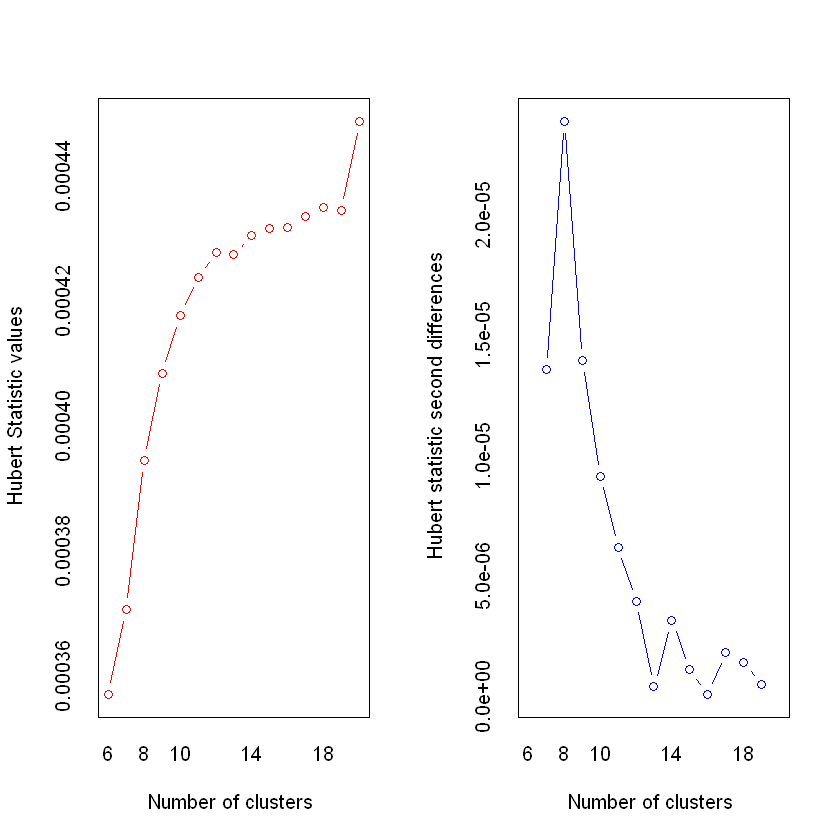

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 6 as the best number of clusters 
* 2 proposed 7 as the best number of clusters 
* 6 proposed 8 as the best number of clusters 
* 4 proposed 9 as the best number of clusters 
* 3 proposed 10 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 1 proposed 19 as the best number of clusters 
* 2 proposed 20 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  8 
 
 
*************************

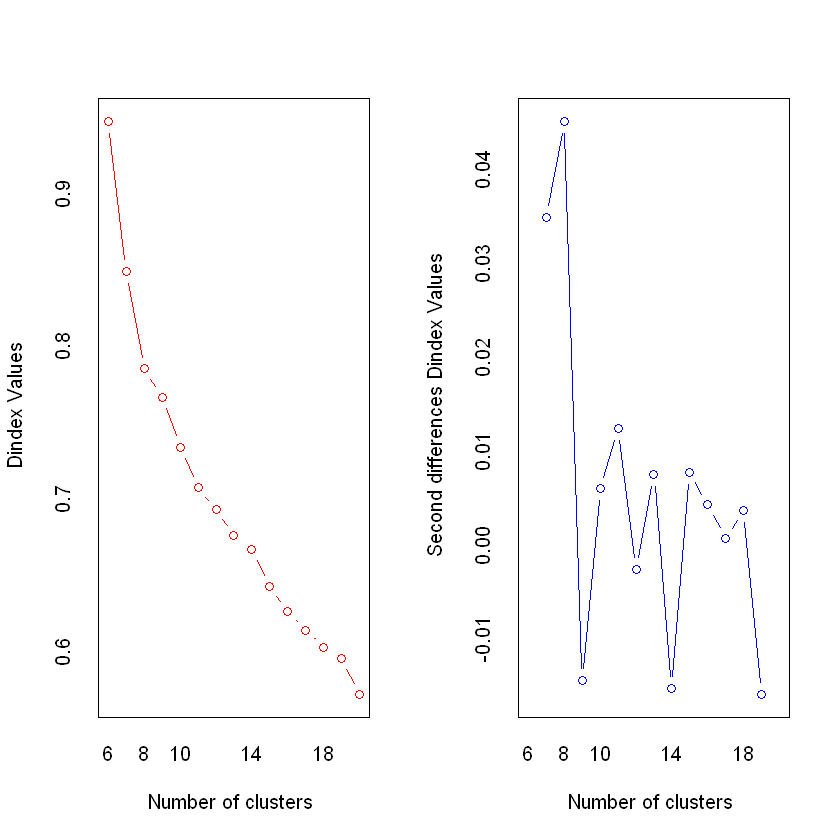

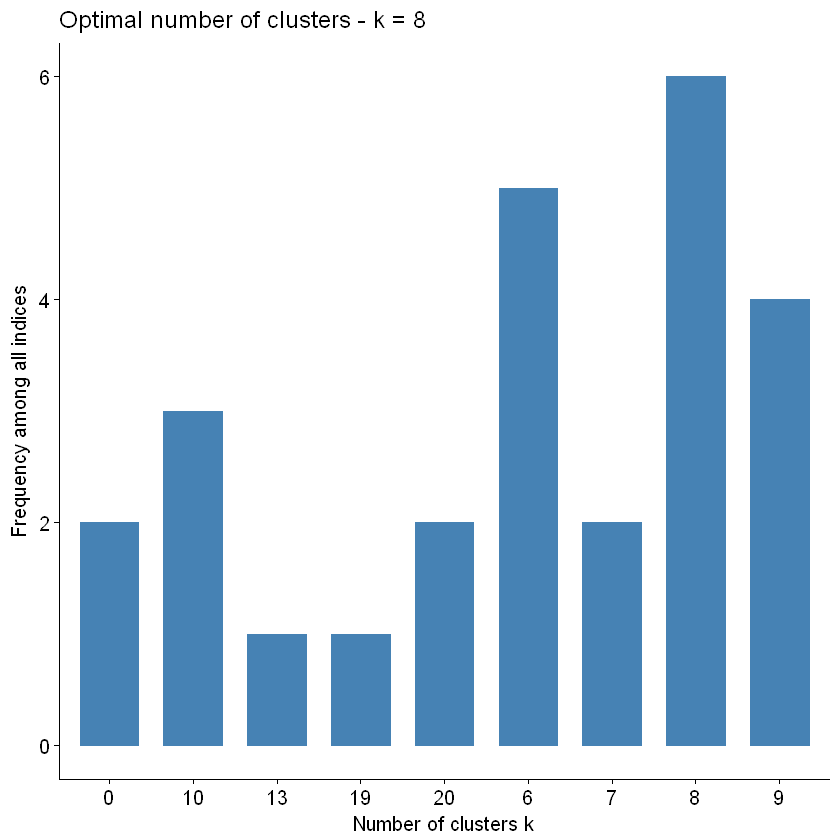

In [23]:
numero_clusters <- NbClust(data = datos, distance = "euclidean", min.nc = 6,
                           max.nc = 20, method = "ward.D2", index = "all")

fviz_nbclust(numero_clusters)

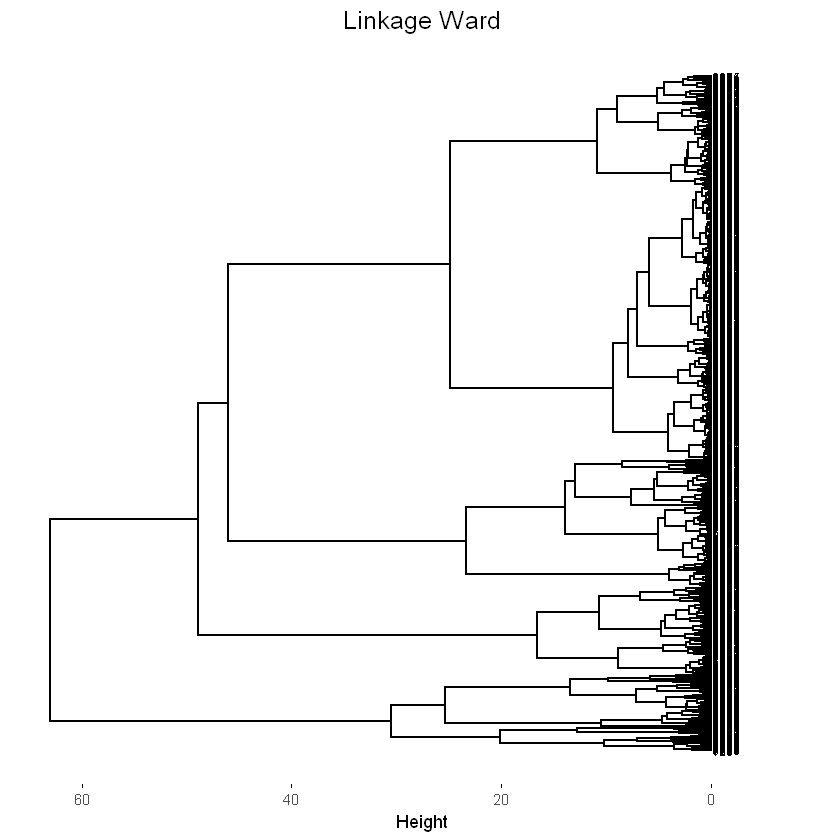

In [24]:
set.seed(101)
hc_euclidea_completo <- hclust(d = dist(x = datos, method = "euclidean"),
                               method = "ward.D2")
fviz_dend(x = hc_euclidea_completo, 
          cex = 0.5, 
 
         
          rect = TRUE,
          rect_fill = TRUE,
          horiz = TRUE,
           
          ,main = "Linkage Ward",
          sub = "Distancia euclídea") +
  theme(plot.title =  element_text(hjust = 0.5, size = 15))

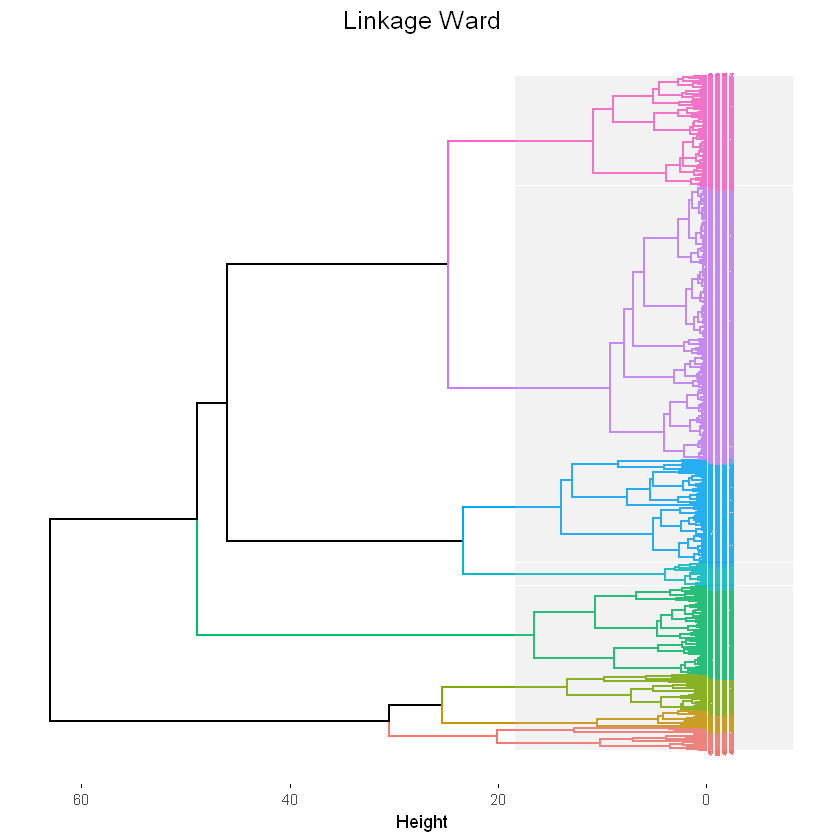

In [25]:
# Se obtiene el dendrograma de hierarchical clustering para elegir el número de
# clusters.
set.seed(101)
hc_euclidea_completo <- hclust(d = dist(x = datos, method = "euclidean"),
                               method = "ward.D2")
fviz_dend(x = hc_euclidea_completo, 
          cex = 0.5, 
          k = 8, 
          color_labels_by_k = TRUE,
          rect = TRUE,
          rect_fill = TRUE,
          horiz = TRUE,
           
          ,main = "Linkage Ward",
          sub = "Distancia euclídea") +
  theme(plot.title =  element_text(hjust = 0.5, size = 15))

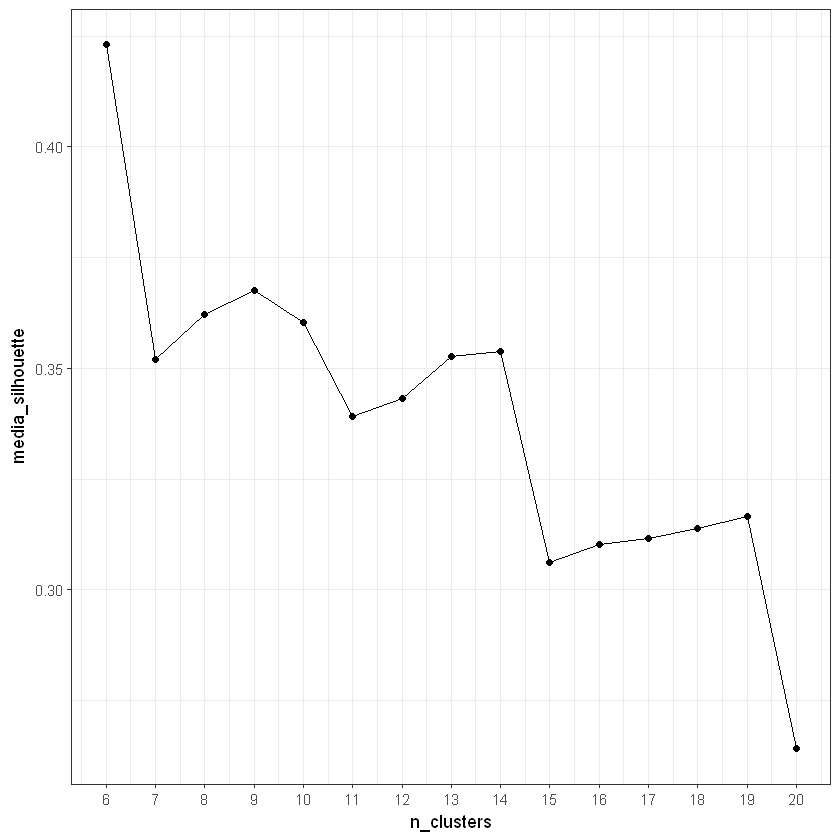

In [26]:
# ÍNDICES SILUETA HIERARCHICAL CLUSTERING
# ==============================================================================

custom_silhouette <- function(n_clusters, dendograma, distancia, datos){
  # Esta función calcula el indice silueta medio de un dendograma
  # para un determinado número de clusters.
  set.seed(123)
  valores_silhouette <- cluster::silhouette(stats::cutree(dendograma,
                                                          k = n_clusters),
                                           get_dist(x = datos, method = distancia))
  media_silhouette <- summary(valores_silhouette)[[4]]
  return(media_silhouette)
}

hc_euclidea_ward<- hclust(d = dist(x = datos, method = "euclidean"),
                               method = "ward.D2")
valores_medios_silhouette <- map_dbl(.x = 6:20,
                                     .f = custom_silhouette,
                                     dendograma = hc_euclidea_ward,
                                     distancia = "euclidean",
                                     datos = datos)

data.frame(n_clusters = 6:20, media_silhouette = valores_medios_silhouette) %>%
  ggplot(aes(x = n_clusters, y = media_silhouette)) +
    geom_line() +
    geom_point() +
    scale_x_continuous(breaks = 6:20) +
    theme_bw()

In [27]:
# Cortamos en 8 grupos 
sub_grp <- cutree(hc_euclidea_completo, k = 8)

# Numero de elementos por cada cluster 
table(sub_grp)

sub_grp
  1   2   3   4   5   6   7   8 
762 306 287 247  64  62 100  49 

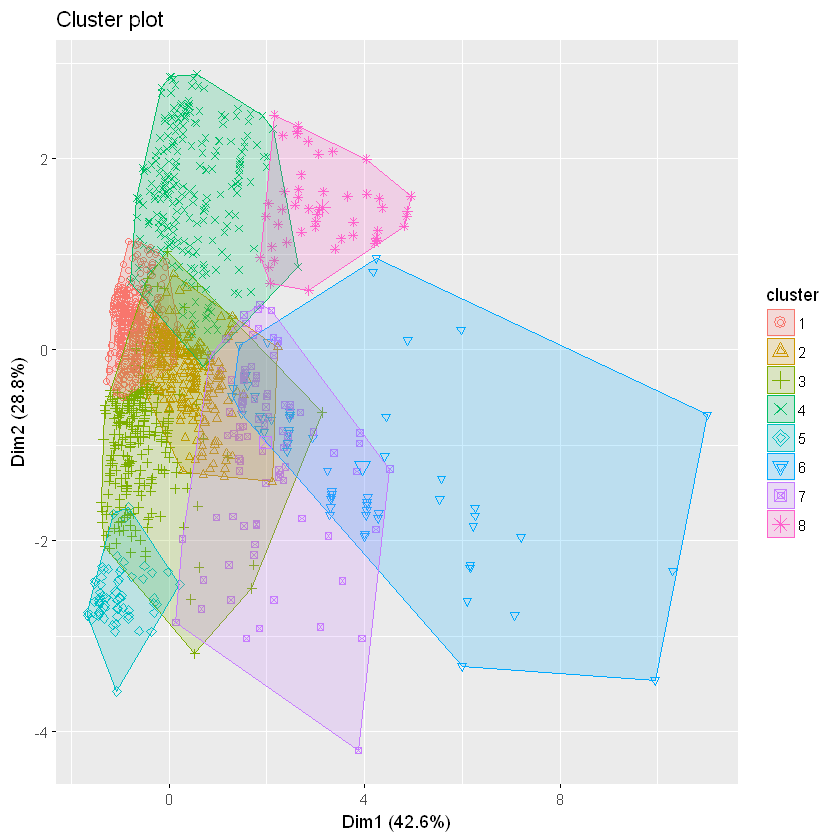

In [28]:
fviz_cluster(list(data = datos, cluster = sub_grp), geom = "point")

* ### Ancho de la Silueta

Silhouette of 1877 units in 8 clusters from silhouette.default(x = sub_grp, dist = dist(datos)) :
 Cluster sizes and average silhouette widths:
      762       306       287       247        64        62       100        49 
0.5532280 0.2248692 0.1057124 0.2807700 0.6714152 0.1317346 0.1749548 0.4266671 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.5843  0.2046  0.4084  0.3621  0.5968  0.7745 

  cluster size ave.sil.width
1       1  762          0.55
2       2  306          0.22
3       3  287          0.11
4       4  247          0.28
5       5   64          0.67
6       6   62          0.13
7       7  100          0.17
8       8   49          0.43


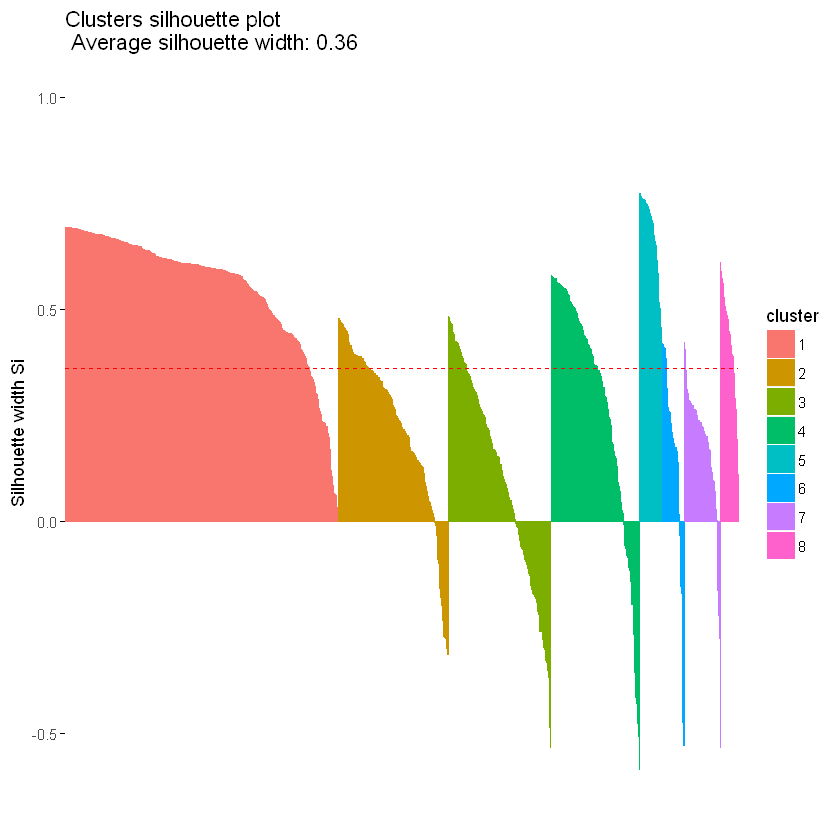

In [29]:
sil.km <- silhouette(sub_grp, 
                     dist(datos))

sil.sum <- summary(sil.km)
sil.sum

fviz_silhouette(sil.km)

* ### Indice de Dunn

In [30]:
dd <- dist(datos, method = "euclidean")
h_stats <- cluster.stats(dd, sub_grp)
#km_stats$within.cluster.ss
#km_stats$clus.avg.silwidths
h_stats$dunn

[1] 0.01105303

In [31]:
results<- add_results(results, algorithm="Agglomerative", strategy="Ward", distance="euclidean", h_stats)
results

Algorithm,Strategy,Distance,Clusters,Silhouette_Score,Cluster_Elements
K-means,,euclidean,7,0.4053732,878/280/273/217/123/57/49
Agglomerative,Ward,euclidean,8,0.3620669,762/306/287/247/100/64/62/49


* ### 3 DBSCAN

DBSCAN es un algoritmo basado en densidad que recibe dos parametros, el primero corresponde a la cantidad de elementos minimos n que se requieren para formar el núcleo de un cluster. Para este parametro se utilizara un valor porcentual de los datos igual al 2.5% es decir que n = 46. El segundo parametro corresponde al radio de la vecindad que tiene cada punto.Este parametro puede ser muy sensible y complicado de encontrar un valor optimo, por lo que se realizaran diferentes pruebas tomando un rango de valores entre 0.05 y 3.0 con una separación de 0.075 entre cada valor.  

In [32]:
# Cálculo de min_pts
k <- 0.0020 # Porcentaje elegido. 
min_pts <- round(nrow(datos) * k) # Cálculo de min_pts. 
if (min_pts <= 1) { # Elimino la opción de un min_pts < 1 y limito su valor máximo.   
min_pts <- 2 } else if (min_pts >= 10) {
   min_pts <- 10
 }
min_pts

[1] 4

La función auto_eps() devuelve el valor del eje Y (eps) en el que se produce el valor de la pendiente m elegido

In [33]:
#epsilon <- auto_eps(datos, min_pts)
#epsilon

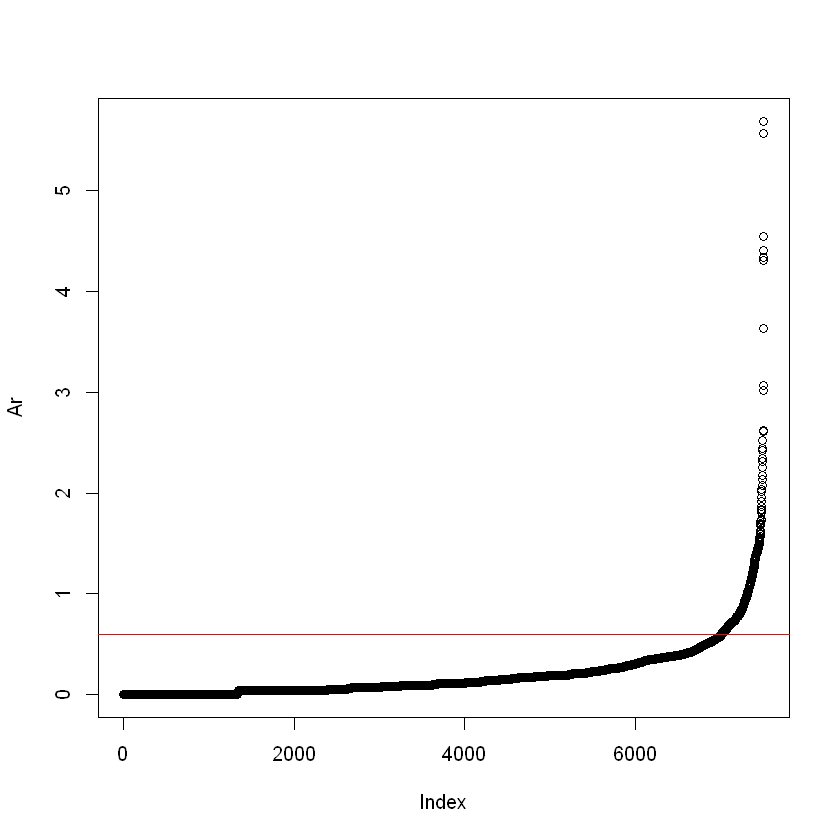

In [34]:
A <- dbscan::kNNdist(datos, k = min_pts)
Ar <- A[order(A)]
plot(Ar)
abline(h=0.6, col = "red", lty=7)

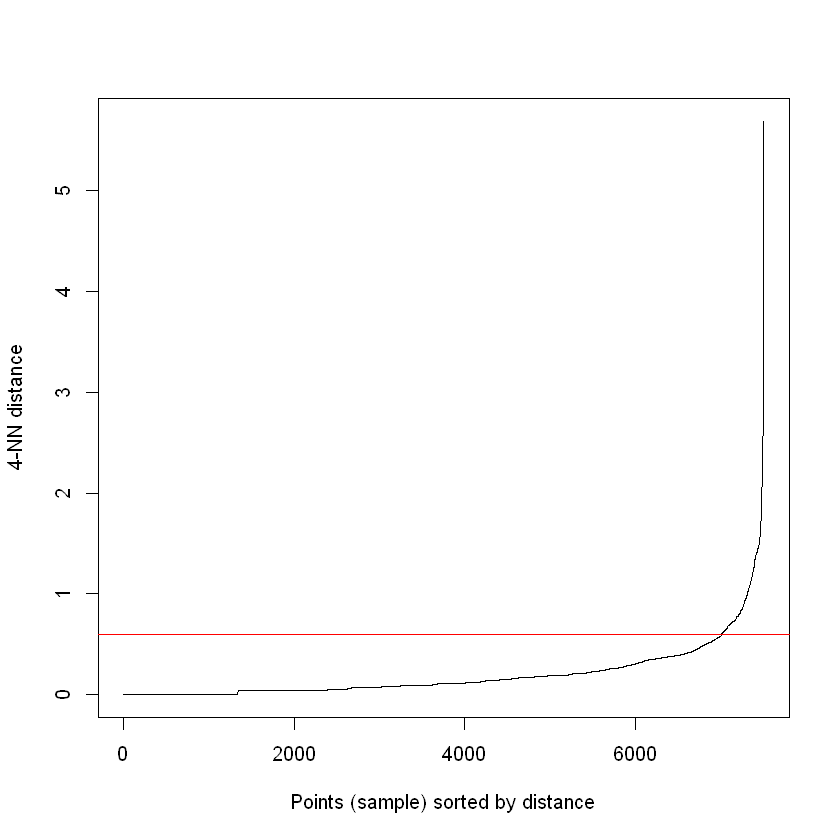

In [35]:
# Selección del valor óptimo de epsilon. Como valor de minPts se emplea 5.
dbscan::kNNdistplot(datos, k = min_pts)
abline(h=0.6, col = "red", lty=7)

In [36]:
set.seed(321)

# DBSCAN con epsilon = 0.6 y minPts = 4
dbscan_cluster <- fpc::dbscan(data = datos, eps = 0.6, MinPts = 4)

# Resultados de la asignación
print(dbscan_cluster)

dbscan Pts=1877 MinPts=4 eps=0.6
         0    1 2 3  4  5 6 7 8  9 10 11 12 13
border 105   20 2 0  0  2 4 0 0  3  0  1  0  2
seed     0 1644 1 9 10 13 2 4 4 26  5 13  5  2
total  105 1664 3 9 10 15 6 4 4 29  5 14  5  4


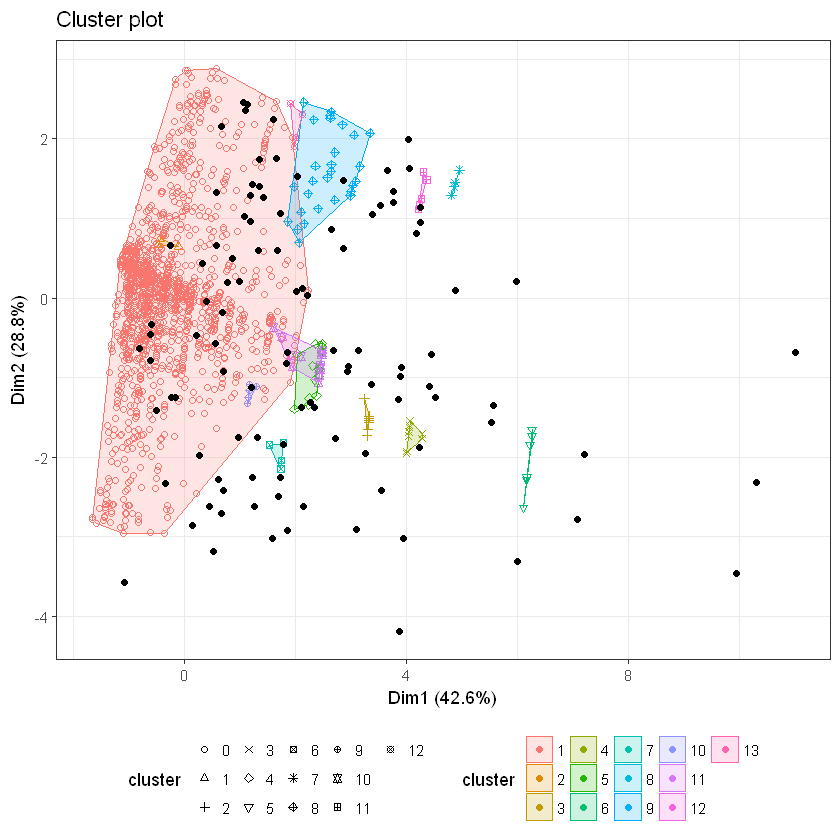

In [37]:
##Visualización de los clusters
fviz_cluster(object = dbscan_cluster, data = datos, stand = FALSE,
             geom = "point", ellipse = TRUE, show.clust.cent = FALSE,
             pallete = "jco") +
  theme_bw() +
  theme(legend.position = "bottom")


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
 105 1664    3    9   10   15    6    4    4   29    5   14    5    4 

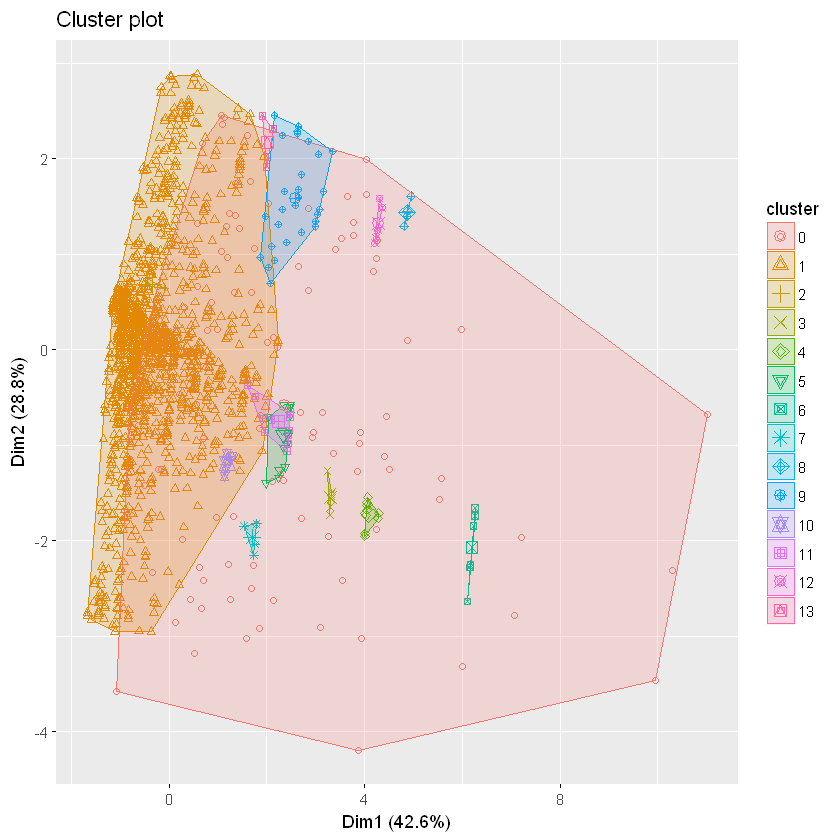

In [38]:
fviz_cluster(list(data = datos, cluster = dbscan_cluster$cluster), geom='point', pallete = "jco")
table(dbscan_cluster$cluster)

## Validación de la Calidad de los Cluster

* ### Ancho de la Silueta

In [80]:
datos_ruidos <- as.data.frame(datos)
datos_ruidos$cluters <- dbscan_cluster$cluster



Silhouette of 1772 units in 13 clusters from silhouette.default(x = datos_ruidos[datos_ruidos$cluters != 0,  from     5], dist = dist(datos_ruidos[datos_ruidos$cluters != 0, 1:4])) :
 Cluster sizes and average silhouette widths:
     1664         3         9        10        15         6         4         4 
0.2047785 0.8533635 0.8278940 0.7471190 0.6184127 0.7760682 0.8133877 0.6755603 
       29         5        14         5         4 
0.1544963 0.8129131 0.6283644 0.5782304 0.6824747 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.79775 -0.02047  0.36645  0.22635  0.50051  0.88270 

   cluster size ave.sil.width
1        1 1664          0.20
2        2    3          0.85
3        3    9          0.83
4        4   10          0.75
5        5   15          0.62
6        6    6          0.78
7        7    4          0.81
8        8    4          0.68
9        9   29          0.15
10      10    5          0.81
11      11   14          0.63
12      12    5          0.58
13      13    4          0.68


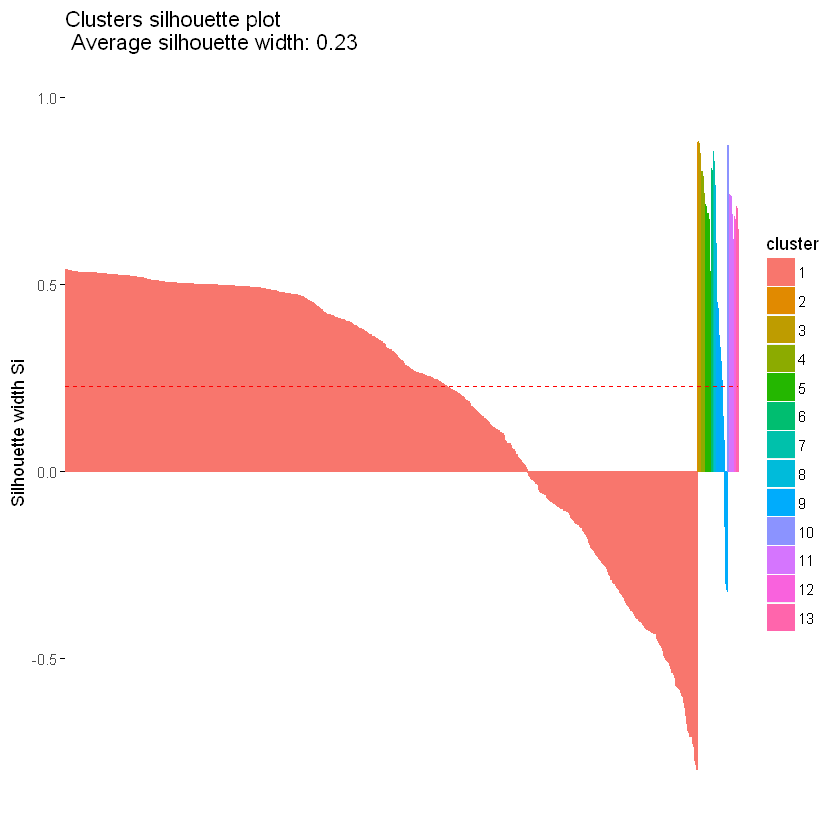

In [81]:
sil.km <- silhouette(datos_ruidos[datos_ruidos$cluters != 0,5], 
                     dist(datos_ruidos[datos_ruidos$cluters != 0,1:4]))

sil.sum <- summary(sil.km)
sil.sum

fviz_silhouette(sil.km)

* ### Indice de Dunn

In [83]:
dd <- dist(datos_ruidos[datos_ruidos$cluters != 0,1:4], method = "euclidean")
dbscan_stats <- cluster.stats(dd, datos_ruidos[datos_ruidos$cluters != 0,5])
#km_stats$within.cluster.ss
#km_stats$clus.avg.silwidths
dbscan_stats$dunn

[1] 0.08464071

In [84]:
results<- add_results(results, algorithm="DBSCAN", strategy="", distance="euclidean", dbscan_stats)
results

Algorithm,Strategy,Distance,Clusters,Silhouette_Score,Cluster_Elements
K-means,,euclidean,7,0.40537324,878/280/273/217/123/57/49
Agglomerative,Ward,euclidean,8,0.36206693,762/306/287/247/100/64/62/49
DBSCAN,,euclidean,14,0.18245809,1664/105/29/15/14/10/9/6/5/5/4/4/4/3
Model,GMM,euclidean,9,0.01499103,309/303/271/237/229/190/133/110/95
DBSCAN,,euclidean,13,0.22634603,1664/29/15/14/10/9/6/5/5/4/4/4/3


* ### 4 Algoritmo basado en modelos

Decidir cuál es el método de clustering más adecuado para un determinado set de datos es un proceso complejo ya que se tienen que analizar uno a uno múltiples índices, estadísticos y parámetros (número de clusters, homogeneidad, separación, significancia…). El paquete clValid agiliza el proceso ofreciendo la posibilidad de comparar, de forma simultánea, múltiples algoritmos de clustering en una única función.

In [42]:
# Model-based-clustering
model_clustering <- Mclust(data = datos, G = 1:10)
summary(model_clustering)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEV (ellipsoidal, equal shape) model with 9 components:

 log.likelihood    n  df      BIC       ICL
      -3364.471 1877 110 -7558.06 -7913.487

Clustering table:
  1   2   3   4   5   6   7   8   9 
309 229 133 237 271  95 190 303 110 

In [43]:
# Grado de asignación a cada cluster
head(model_clustering$z)

1,9.767926e-01,0.0001068837,0.00000e+00,1.169155e-06,4.377783e-20,1.212094e-07,5.219175e-05,2.304694e-02,1.265580e-07
2,1.587825e-18,0.9272550987,0.00000e+00,2.082683e-03,4.490435e-02,4.482296e-05,2.522238e-02,4.442027e-08,4.906156e-04
3,1.140618e-05,0.0028163443,0.00000e+00,1.403111e-05,1.103474e-115,3.854853e-05,2.140105e-13,9.971172e-01,2.505753e-06
4,6.909189e-04,0.0027966055,9.96144e-01,1.657651e-04,3.068719e-26,1.121256e-05,1.194568e-04,7.132673e-05,7.123117e-07
5,5.947994e-115,0.0017100753,3.61550e-47,8.624921e-04,0.000000e+00,9.972443e-01,1.333676e-235,1.073598e-04,7.574454e-05
6,9.861009e-01,0.0002006618,0.00000e+00,1.473412e-06,1.112917e-03,2.959776e-08,9.382122e-08,1.258352e-02,3.824482e-07


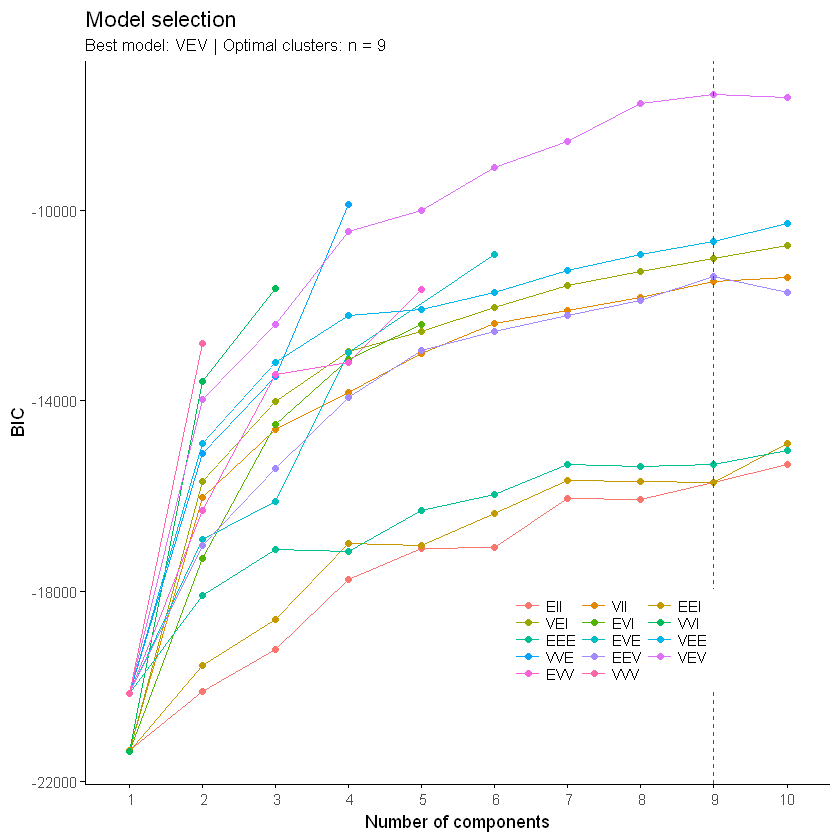

In [44]:
# Curvas del valor BIC en función del número de clusters para cada modelo.
# Atención al orden en el que se muestra la variable horizontal, por defecto es
# alfabético.
fviz_mclust(object = model_clustering, what = "BIC", pallete = "jco") +
  scale_x_discrete(limits = c(1:10))

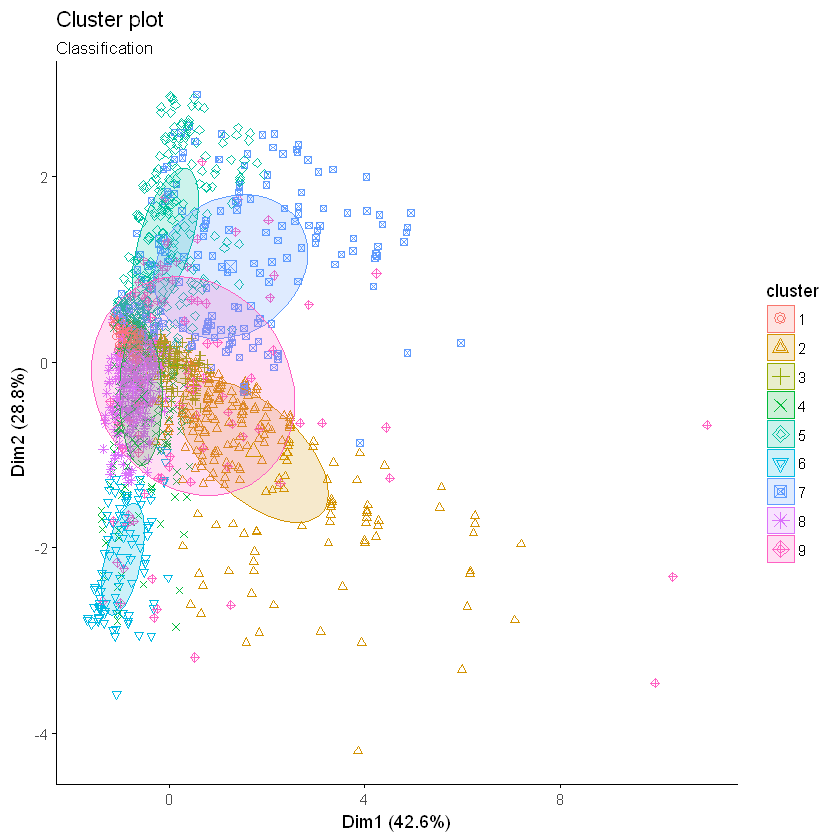

In [45]:
# Clusters
fviz_mclust(model_clustering, what = "classification", geom = "point",
            pallete = "jco")

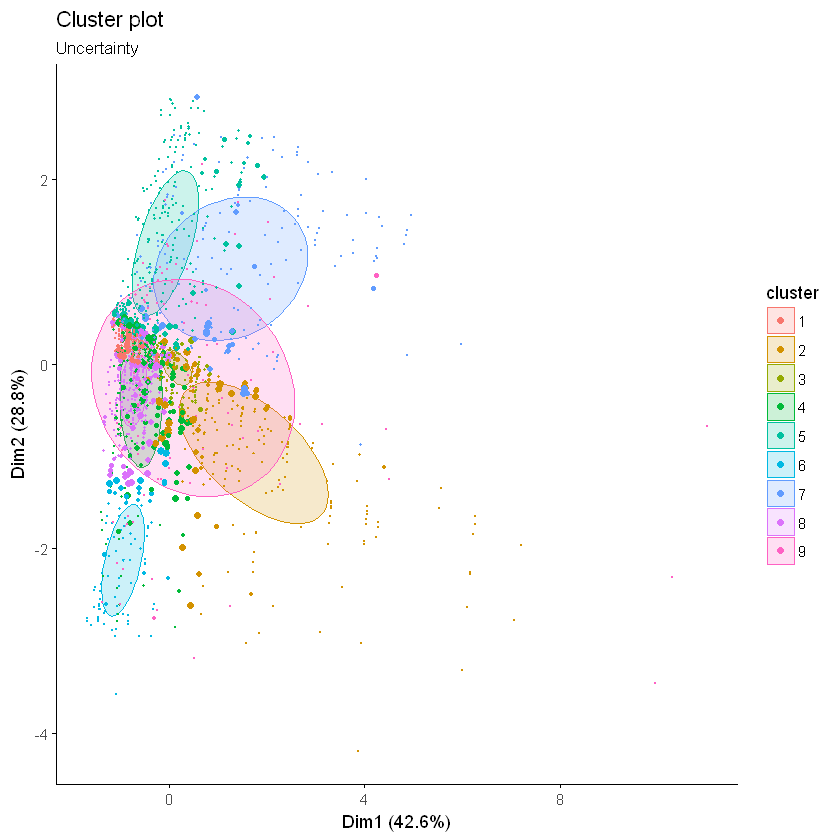

In [46]:
# Certeza de las clasificaciones. Cuanto mayor el tamaño del punto menor la
# seguridad de la asignación
fviz_mclust(model_clustering, what = "uncertainty", pallete = "jco")

## Validación de la Calidad de los Cluster

* ### Ancho de la Silueta

Silhouette of 1877 units in 9 clusters from silhouette.default(x = model_clustering$classification, dist = dist(datos)) :
 Cluster sizes and average silhouette widths:
       309        229        133        237        271         95        190 
 0.6049894 -0.1656739  0.4562286 -0.4115903 -0.1405408  0.4570204 -0.2450452 
       303        110 
-0.0140443 -0.3501100 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.86740 -0.36960  0.05883  0.01499  0.39349  0.68704 

  cluster size ave.sil.width
1       1  309          0.60
2       2  229         -0.17
3       3  133          0.46
4       4  237         -0.41
5       5  271         -0.14
6       6   95          0.46
7       7  190         -0.25
8       8  303         -0.01
9       9  110         -0.35


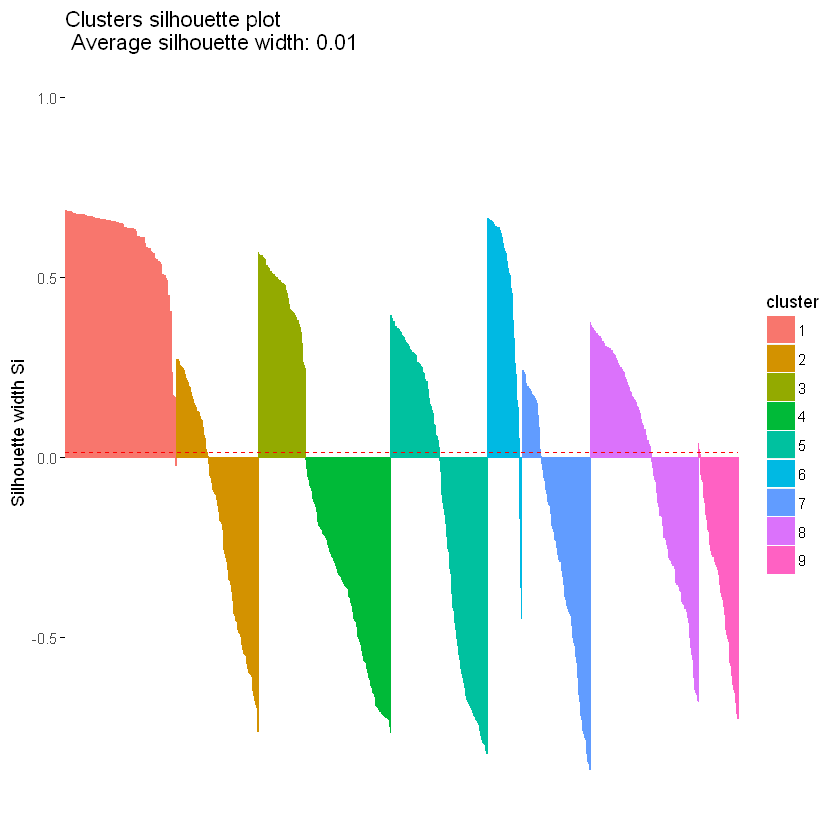

In [47]:
sil.km <- silhouette(model_clustering$classification, 
                     dist(datos))

sil.sum <- summary(sil.km)
sil.sum

fviz_silhouette(sil.km)

* ### Indice de Dunn

In [48]:
dd <- dist(datos, method = "euclidean")
model_stats <- cluster.stats(dd, model_clustering$classification)
#km_stats$within.cluster.ss
#km_stats$clus.avg.silwidths
model_stats$dunn

[1] 0.002785985

In [54]:
results<- add_results(results, algorithm="Model", strategy="GMM", distance="euclidean", model_stats)
results

Algorithm,Strategy,Distance,Clusters,Silhouette_Score,Cluster_Elements
K-means,,euclidean,7,0.40537324,878/280/273/217/123/57/49
Agglomerative,Ward,euclidean,8,0.36206693,762/306/287/247/100/64/62/49
DBSCAN,,euclidean,14,0.18245809,1664/105/29/15/14/10/9/6/5/5/4/4/4/3
Model,GMM,euclidean,9,0.01499103,309/303/271/237/229/190/133/110/95


results

## Evaluación de negocio

In [6]:
km.res <- kmeans(datos, 7, nstart = 50)

datos_agrupados <- data %>% mutate(grupo = km.res$cluster)
head(datos_agrupados, 5)



VMName,RAM,RAM_percentage,RAM_LastAvgUse_Gb_SD,CPUCount,CPU_percentage,CPU_LastAvgUse_MHz_SD,NETWORK_LastInboundAvgUse_Kbps_P95,NETWORK_LastInboundAvgUse_Kbps_SD,NETWORK_LastOutboundAvgUse_Kbps_P95,NETWORK_LastOutboundAvgUse_Kbps_SD,grupo
1000095_WINDOWS_SERVER_2012_R2_DATACENTER_64Bits,4,100,1,2,9,331,90,38,62,78,2
100634_FUNDACION_CIDCA_WIN_2003_32BIT_NEW (8f6e8a9c-c313-4a0a-9ba7-6573eae022d8),24,100,0,12,1,158,0,0,0,1,4
1006695_WINDOWS_SERVER_2016_DATACENTER_64 (55f438ca-6813-43df-83fa-892ea2c0b78d),4,100,0,2,21,337,0,19,0,1,2
100854_SERFIN_Contardocloud (07200194-5a6a-4629-9242-d17b265099e0),8,100,0,8,10,585,5,7,7,13,2
100854_SERFIN_Contardocloud_0501,8,100,0,8,71,5810,34,13,20,9,5


In [7]:
datos_agrupados <- data[,features] %>% mutate(grupo = km.res$cluster)
head(datos_agrupados, 5)


RAM,RAM_percentage,CPUCount,CPU_percentage,grupo
4,100,2,9,2
24,100,12,1,4
4,100,2,21,2
8,100,8,10,2
8,100,8,71,5


In [8]:
library(psych)

x <- describeBy(datos_agrupados[, features],datos_agrupados$grupo)
x


Attaching package: 'psych'


The following object is masked from 'package:mclust':

    sim


The following objects are masked from 'package:scales':

    alpha, rescale


The following objects are masked from 'package:ggplot2':

    %+%, alpha





 Descriptive statistics by group 
group: 1
               vars  n  mean    sd median trimmed   mad min max range  skew
RAM               1 49 93.14 31.12     92   93.46 41.51  48 128    80  0.09
RAM_percentage    2 49 92.80 18.73    100   97.56  0.00  14 100    86 -2.74
CPUCount          3 49 28.53 11.12     28   27.07  5.93  12  64    52  1.72
CPU_percentage    4 49 24.14 23.12     21   20.61 16.31   0 120   120  1.90
               kurtosis   se
RAM               -1.84 4.45
RAM_percentage     6.84 2.68
CPUCount           3.77 1.59
CPU_percentage     4.70 3.30
------------------------------------------------------------ 
group: 2
               vars   n  mean   sd median trimmed  mad min max range  skew
RAM               1 878  8.14 5.97      8    7.28 5.93   1  32    31  1.69
RAM_percentage    2 878 97.26 5.86    100   98.84 0.00  68 100    32 -2.94
CPUCount          3 878  3.73 1.99      4    3.50 2.97   1  10     9  0.93
CPU_percentage    4 878  6.92 6.11      5    6.06 5.93   0  

Loading required package: geepack

Loading required package: geeM

Loading required package: Matrix


Attaching package: 'Matrix'


The following object is masked from 'package:tidyr':

    expand




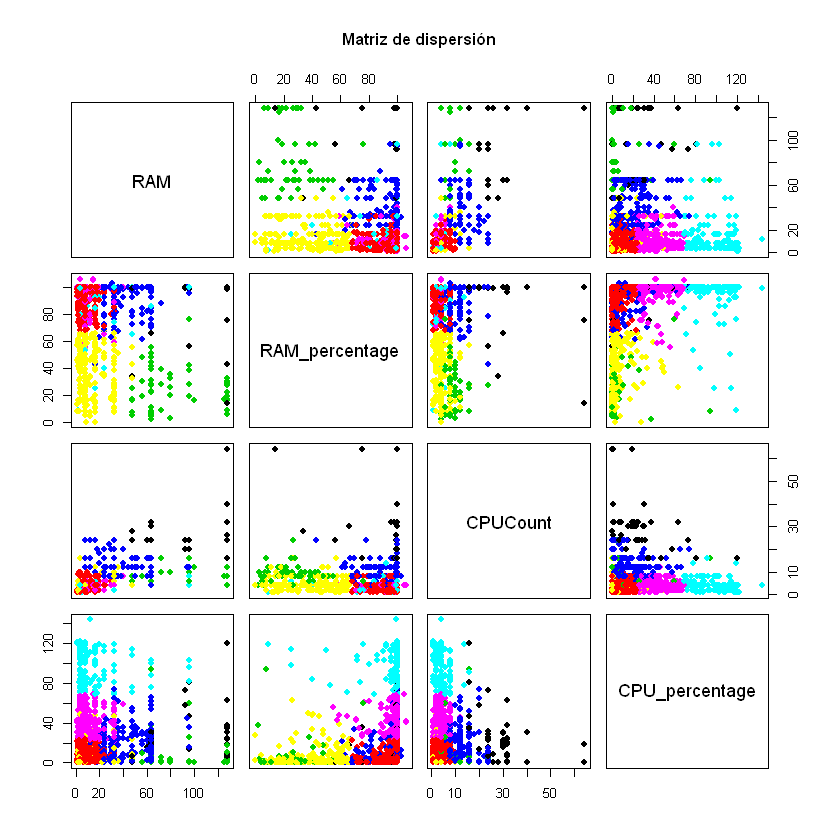

In [9]:
library(MESS)
pairs(datos_agrupados[,1:4],
      main='Matriz de dispersión',
      col= datos_agrupados$grupo,
      cex = 1, 
      cex.main=0.8,
      pch = 19, bg="light blue",
      #diag.panel=panel.box
     )

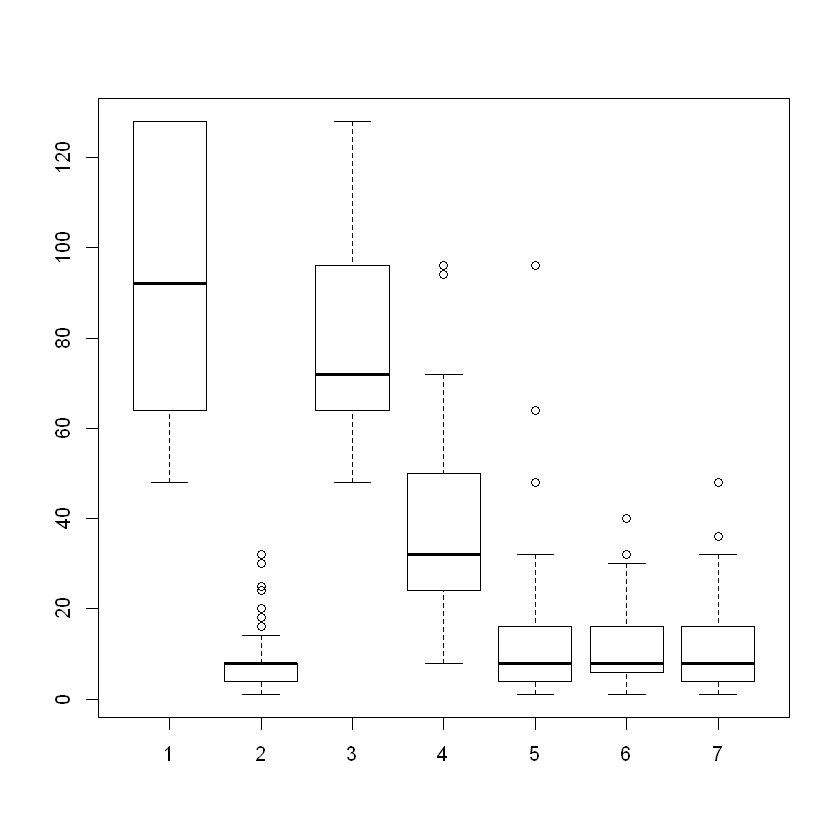

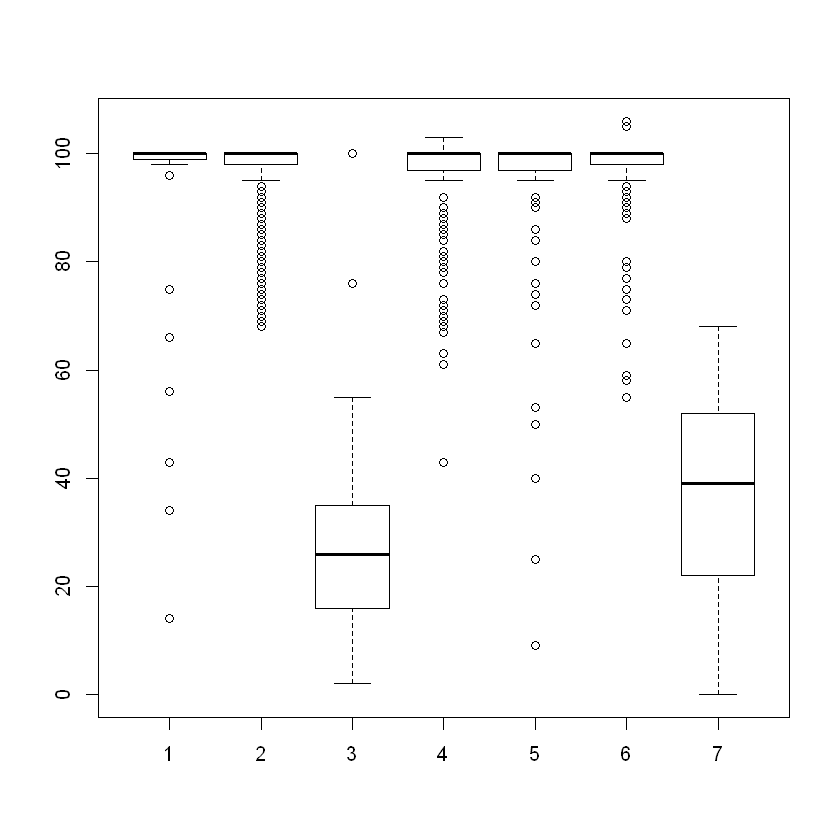

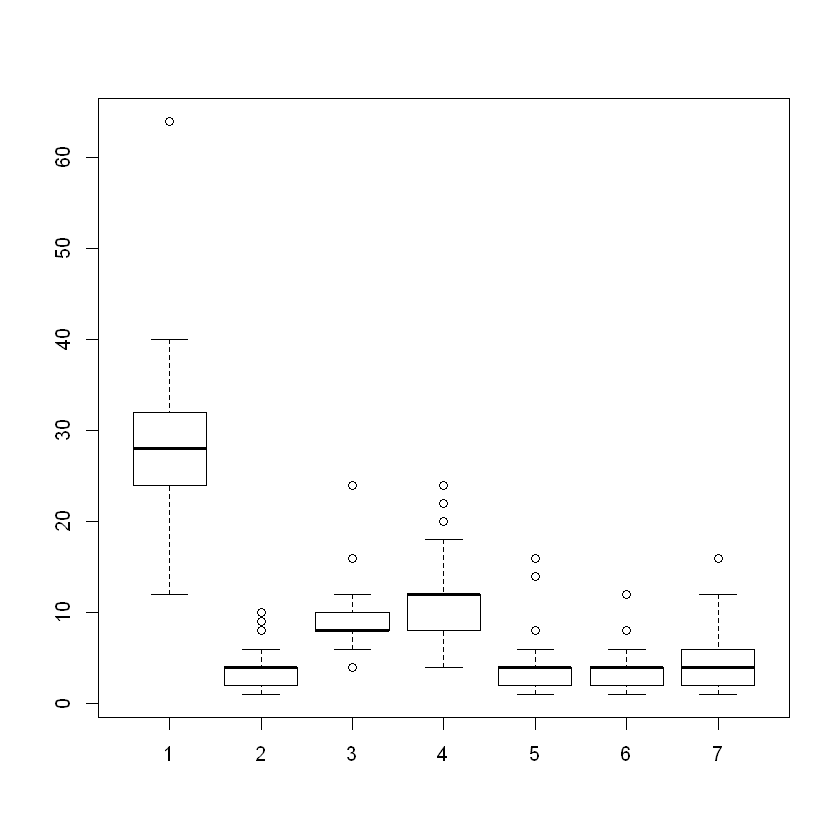

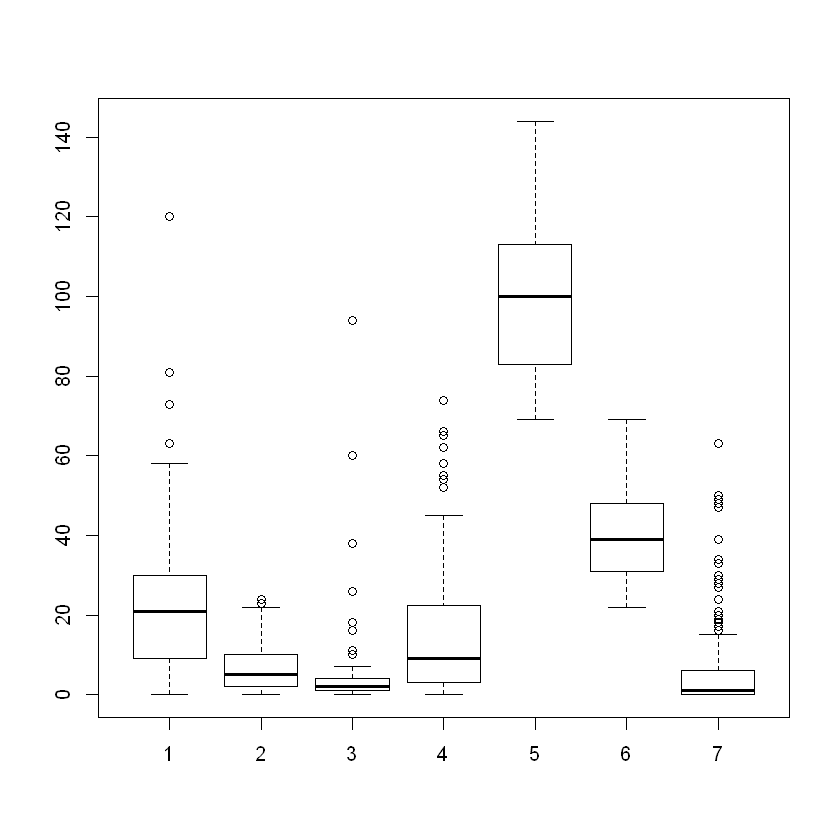

In [10]:
#plot(x = datos_agrupados$grupo, y = datos_agrupados$RAM )

par(mfrow= c(1,1))

boxplot(formula = RAM ~ grupo, data =  datos_agrupados)
boxplot(formula = RAM_percentage ~ grupo, data =  datos_agrupados)
boxplot(formula = CPUCount ~ grupo, data =  datos_agrupados)
boxplot(formula = CPU_percentage ~ grupo, data =  datos_agrupados)


     

In [11]:
library(lattice)

datos_agrupados$grupo <- factor(datos_agrupados$grupo,
                               levels = c(1,2,3,4,5,6,7),
                               labels = c("G1","G2","G3","G4","G5","G6","G7"))



In [12]:
trellis.par.set(theme=col.whitebg())

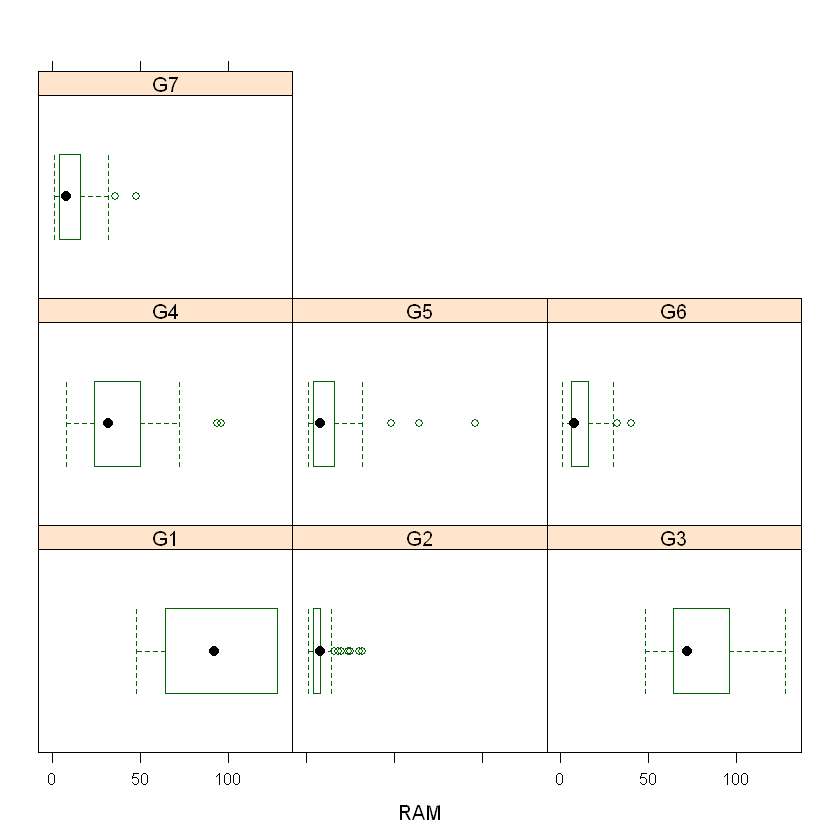

In [121]:
bwplot( ~ RAM | datos_agrupados$grupo,   data = datos_agrupados)


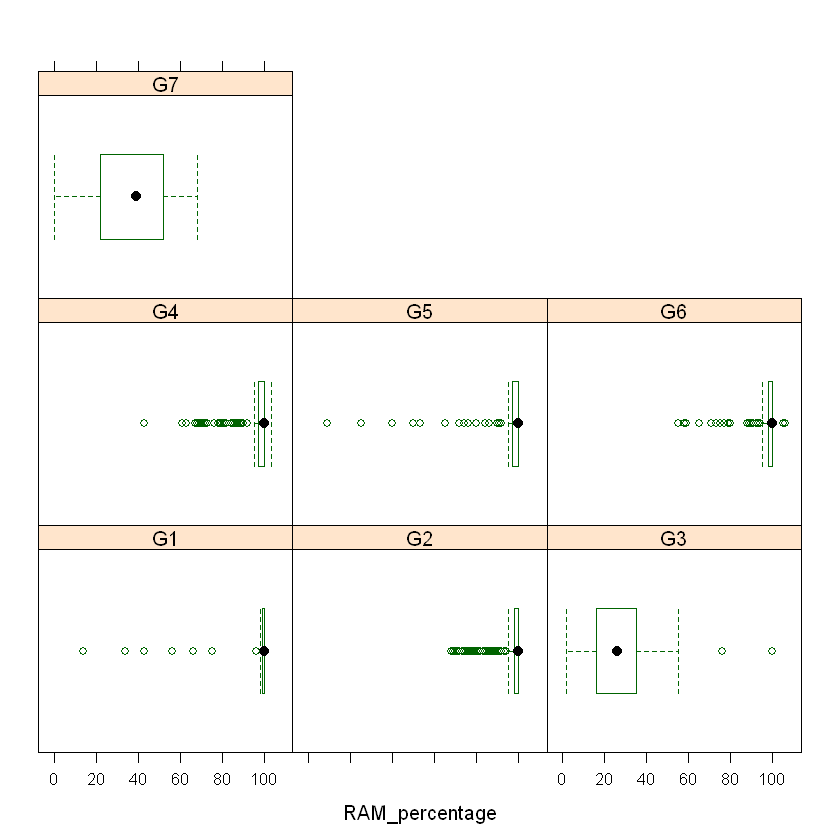

In [14]:
bwplot( ~ RAM_percentage | datos_agrupados$grupo,   data = datos_agrupados)

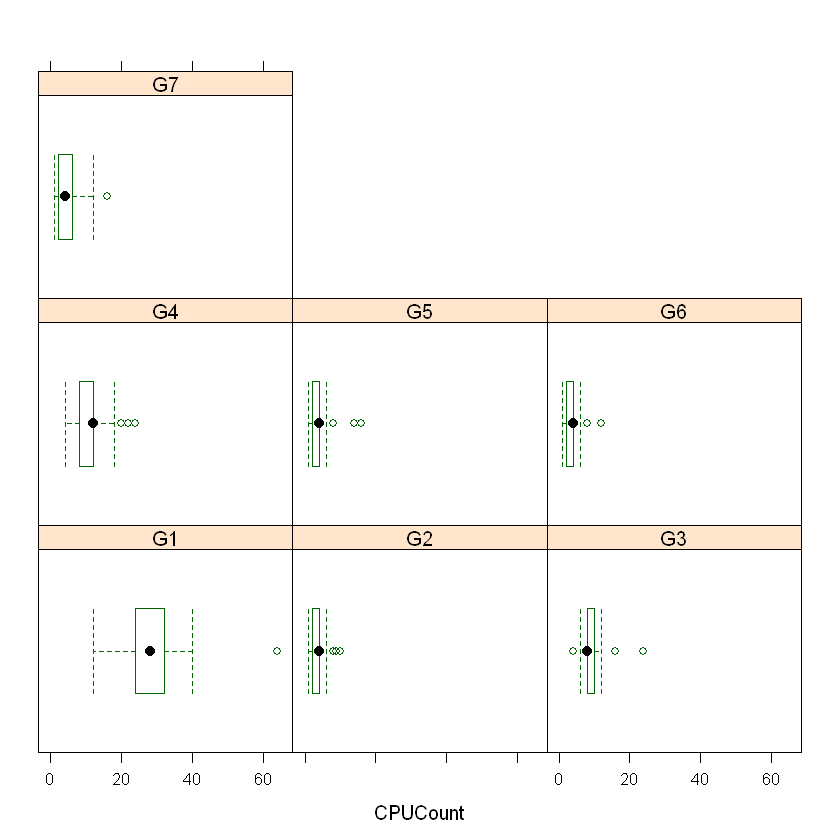

In [15]:
bwplot( ~ CPUCount | datos_agrupados$grupo,   data = datos_agrupados)

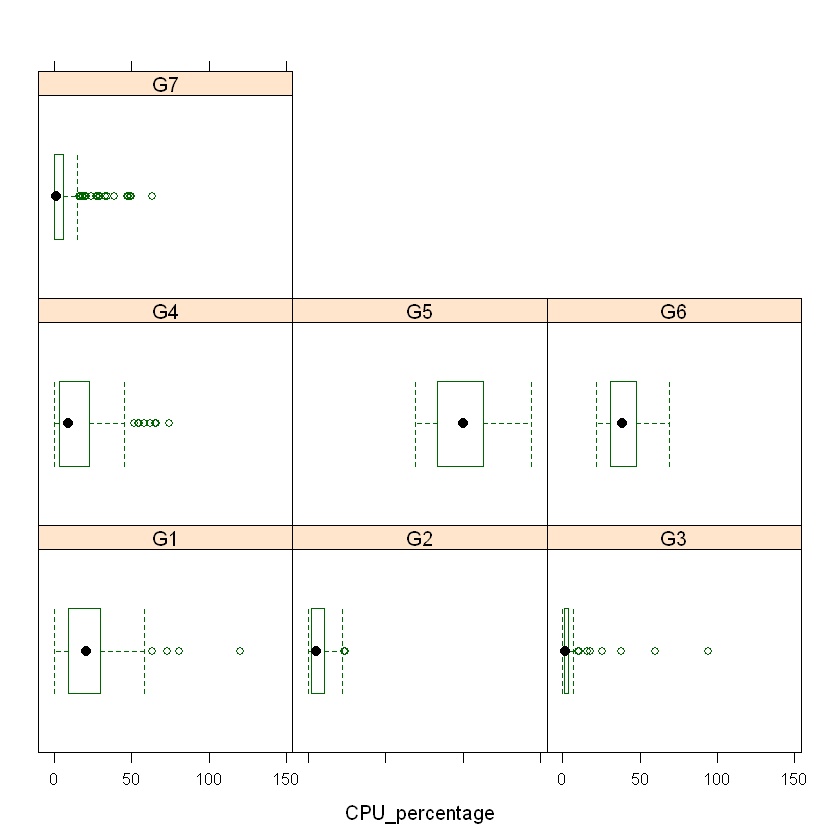

In [16]:
bwplot( ~ CPU_percentage | datos_agrupados$grupo,   data = datos_agrupados)

## Grupo 1

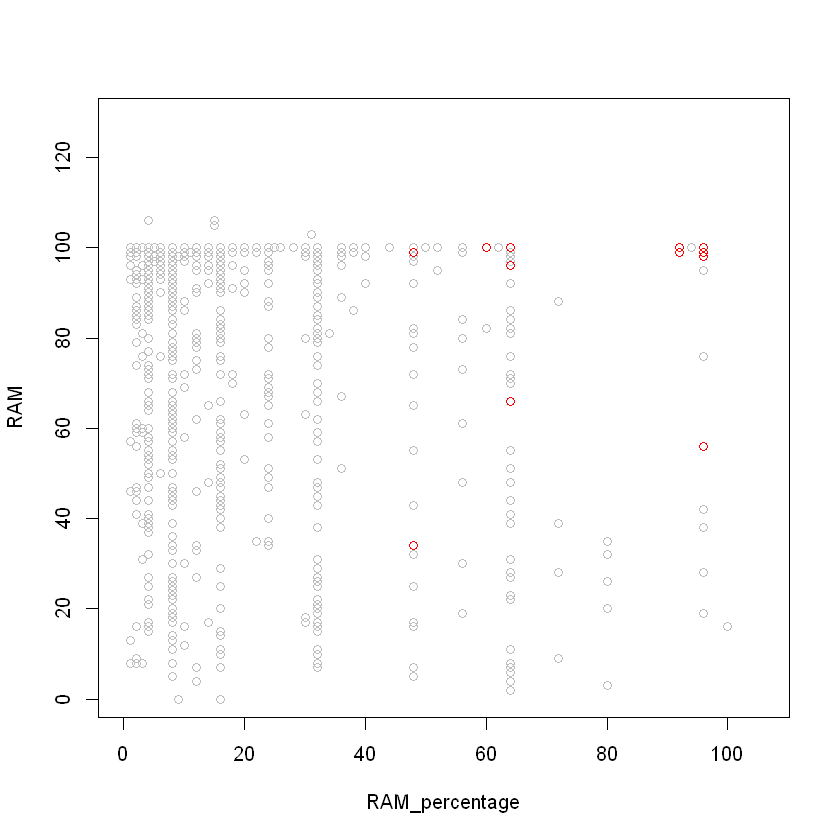

In [35]:
plot(RAM ~ RAM_percentage, type = "n", data = datos_agrupados )
with(subset(datos_agrupados, grupo != "G1"), points (RAM, RAM_percentage, col = "gray"))
with(subset(datos_agrupados, grupo == "G1"), points (RAM, RAM_percentage, col = "red"))

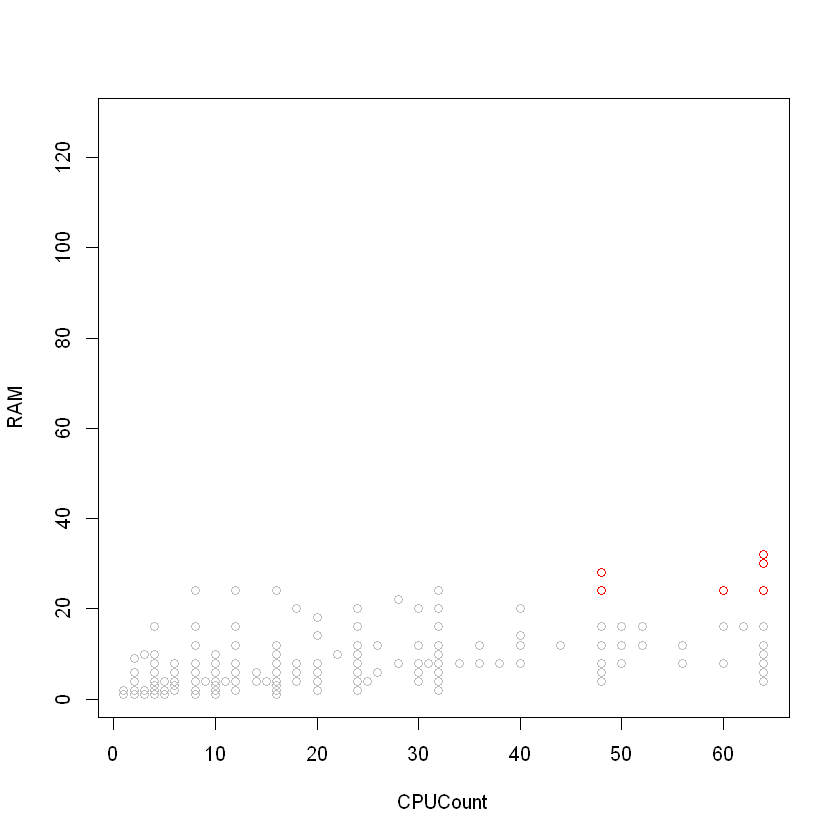

In [36]:
plot(RAM ~ CPUCount, type = "n", data = datos_agrupados )
with(subset(datos_agrupados, grupo != "G1"), points (RAM, CPUCount, col = "gray"))
with(subset(datos_agrupados, grupo == "G1"), points (RAM, CPUCount, col = "red"))


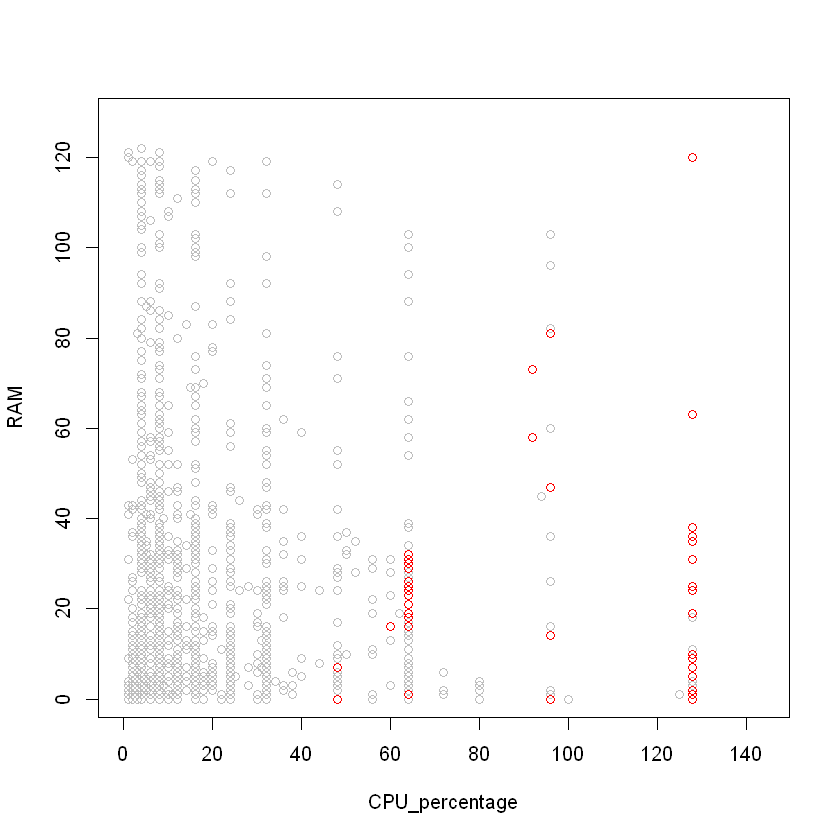

In [38]:
plot(RAM ~ CPU_percentage, type = "n", data = datos_agrupados )
with(subset(datos_agrupados, grupo != "G1"), points (RAM, CPU_percentage, col = "gray"))
with(subset(datos_agrupados, grupo == "G1"), points (RAM, CPU_percentage, col = "red"))


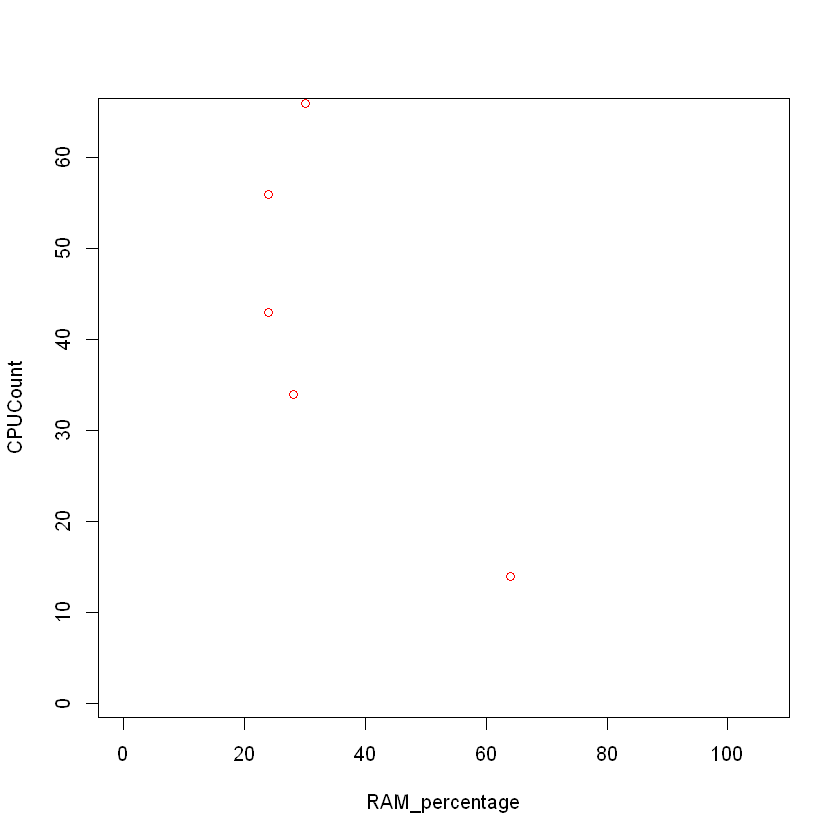

In [150]:
plot(CPUCount ~ RAM_percentage, type = "n", data = datos_agrupados )
#with(subset(datos_agrupados, grupo != "G1"), points (CPUCount, RAM_percentage, col = "gray"))
with(subset(datos_agrupados, grupo == "G1"), points (CPUCount, RAM_percentage, col = "red"))


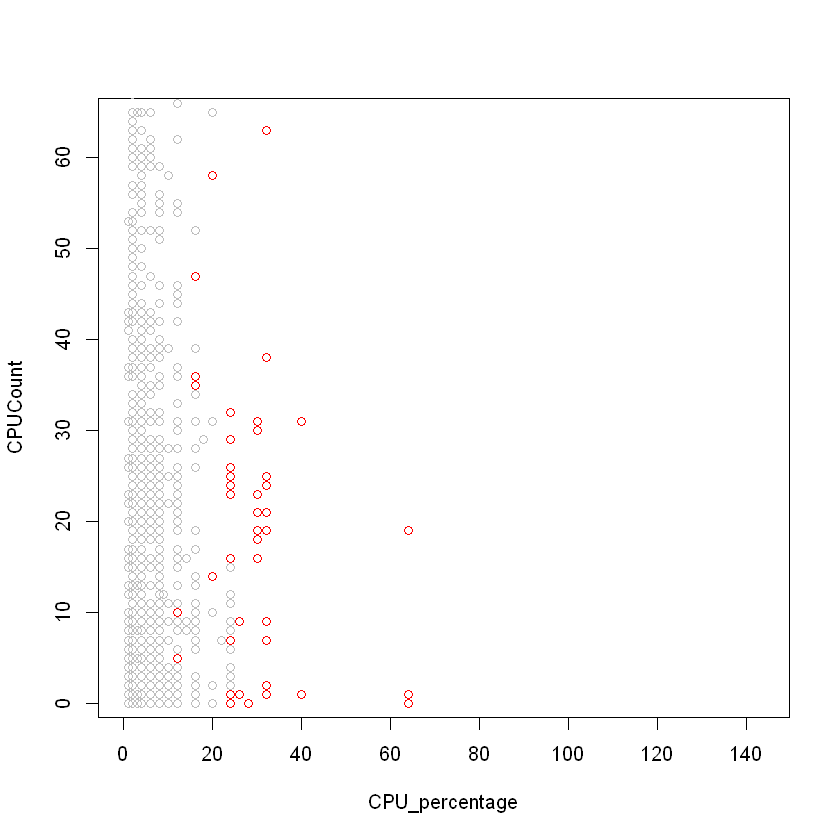

In [40]:
plot(CPUCount ~ CPU_percentage, type = "n", data = datos_agrupados )
with(subset(datos_agrupados, grupo != "G1"), points (CPUCount, CPU_percentage, col = "gray"))
with(subset(datos_agrupados, grupo == "G1"), points (CPUCount, CPU_percentage, col = "red"))


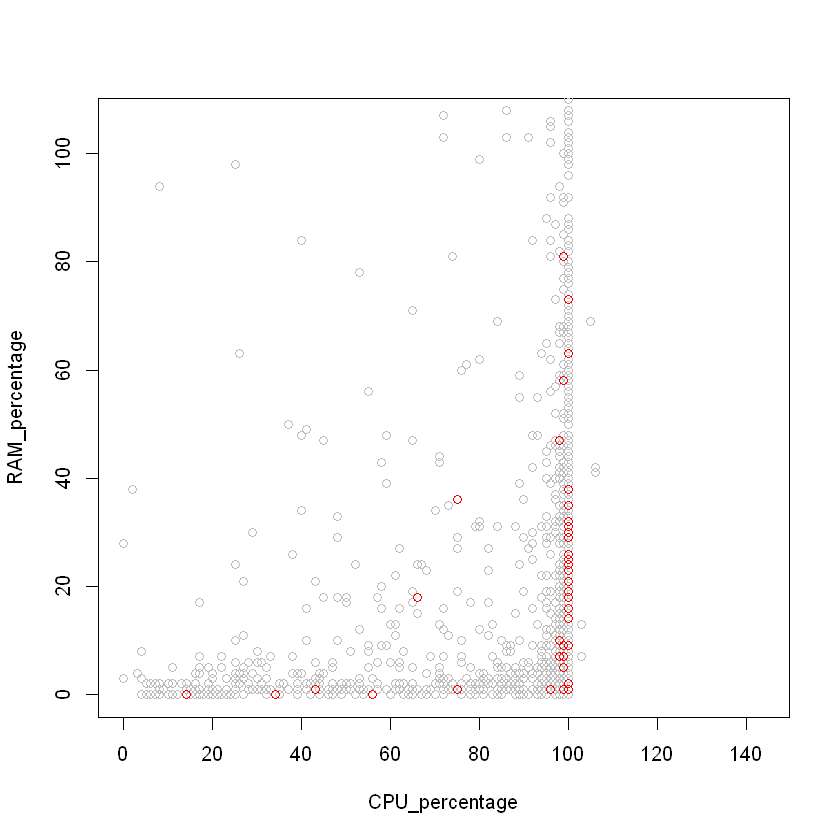

In [41]:
plot(RAM_percentage ~ CPU_percentage, type = "n", data = datos_agrupados )
with(subset(datos_agrupados, grupo != "G1"), points (RAM_percentage, CPU_percentage, col = "gray"))
with(subset(datos_agrupados, grupo == "G1"), points (RAM_percentage, CPU_percentage, col = "red"))


In [77]:
getNumberClass <- function (x)
{
    n <-length(x)
    
    ## Regla de la raiz Cuadrada 
    k1 <- ceiling(sqrt(n))
    print(paste("Raiz cuadrada: ",k1))

    ## Regla de Sturges
    k2 <- ceiling(1+log(n,2))
    print(paste("Sturges: ",k2))


    ## Regla de Scott
    As <- 3.5*sd(x)*n^(-1/3)
    k3 <- ceiling(diff(range(x))/ As)
    print(paste("Scott: ",k3))

    ## Regla de Freedman-Diaconis
    Afd <-2*(quantile(x,0.75, names = FALSE)-quantile(x,0.25, names = FALSE))*n^(-1/3)
    k4= ceiling(diff(range(x))/Afd)
    print(paste("Freedman-Diaconis: ",k4))
    cat ("\n")
    
}  


gp <- subset(datos_agrupados, grupo == "G1")
ram <- gp$RAM
cpu <- gp$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage


getNumberClass(ram)
getNumberClass(cpu)
getNumberClass(ram_p)
getNumberClass(cpu_p)


nclass.scott(ram)


[1] "Raiz cuadrada:  7"
[1] "Sturges:  7"
[1] "Scott:  3"
[1] "Freedman-Diaconis:  3"

[1] "Raiz cuadrada:  7"
[1] "Sturges:  7"
[1] "Scott:  5"
[1] "Freedman-Diaconis:  12"

[1] "Raiz cuadrada:  7"
[1] "Sturges:  7"
[1] "Scott:  5"
[1] "Freedman-Diaconis:  158"

[1] "Raiz cuadrada:  7"
[1] "Sturges:  7"
[1] "Scott:  6"
[1] "Freedman-Diaconis:  11"



[1] 3

In [100]:
int = nclass.scott(ram)
A = ceiling(diff(range(ram))/ int)

A

[1] 27

In [87]:
L1 = min(ram)-1/2*1
L = L1 + A*(0:int)
L



[1]  47.5  74.5 101.5 128.5

In [88]:
X = (L[1:length(L)-1]+L[2:length(L)])/2
X

[1]  61  88 115

In [91]:
cut(ram, L, right = F, include.lowest = TRUE)

[1] [102,128]   [102,128]   [47.5,74.5) [47.5,74.5) [47.5,74.5) [47.5,74.5)
 [7] [102,128]   [102,128]   [47.5,74.5) [47.5,74.5) [102,128]   [47.5,74.5)
[13] [47.5,74.5) [47.5,74.5) [102,128]   [102,128]   [47.5,74.5) [74.5,102) 
[19] [102,128]   [102,128]   [102,128]   [47.5,74.5) [47.5,74.5) [47.5,74.5)
[25] [47.5,74.5) [47.5,74.5) [74.5,102)  [102,128]   [47.5,74.5) [47.5,74.5)
[31] [47.5,74.5) [47.5,74.5) [102,128]   [102,128]   [102,128]   [102,128]  
[37] [102,128]   [102,128]   [74.5,102)  [102,128]   [74.5,102)  [47.5,74.5)
[43] [47.5,74.5) [47.5,74.5) [74.5,102)  [74.5,102)  [47.5,74.5) [102,128]  
[49] [102,128]  
Levels: [47.5,74.5) [74.5,102) [102,128]

In [94]:
TablaFrecs <- function (x,k,A,p){
    L <- min(x)-p/2+A*(0:k)
    x_cut <- cut(x, breaks=L, right=F)
    intervals <- levels(x_cut)
    mc <- (L[1]+L[2])/2 + A*(0:(k-1))
    Fr.abs <- as.vector(table(x_cut))
    Fr.rel <- round(Fr.abs/length(x),4)
    Fr.cum.abs <- cumsum(Fr.abs)
    Fr.cum.rel <- cumsum(Fr.rel)
    tabla <- data.frame(intervals, mc, Fr.abs, Fr.cum.abs, Fr.rel, Fr.cum.rel)
    tabla
}

In [97]:
TablaFrecs(ram,nclass.scott(ram),A,1)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[47.5,74.5)",61,23,23,0.4694,0.4694
"[74.5,102)",88,6,29,0.1224,0.5918
"[102,128)",115,20,49,0.4082,1.0000


In [111]:
TablaFrecs.L <- function (x){
   
    p <- 1
    
    ###
    k <- nclass.scott(x)
    A <- ceiling(diff(range(x))/ k)
    L <- min(x)-p/2+A*(0:k) 
    
    x_cut <- cut(x, breaks=L, right=F, include.lowest = F)
    intervals <- levels(x_cut)
    mc <- (L[1:length(L)-1]+L[2:length(L)])/2
    Fr.abs <- as.vector(table(x_cut))
    Fr.rel <- round(Fr.abs/length(x),4)
    Fr.cum.abs <- cumsum(Fr.abs)
    Fr.cum.rel <- cumsum(Fr.rel)
    tabla <- data.frame(intervals, mc, Fr.abs, Fr.cum.abs, Fr.rel, Fr.cum.rel)
    tabla
}

In [148]:
write.csv (datos_agrupados, "D:/grupos.csv")

## Grupo 1

In [139]:
gp <- subset(datos_agrupados, grupo == "G1" )
ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
length(ram)

[1] 46

In [141]:

gp <- subset(datos_agrupados, grupo == "G1", )


ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
cpu  <- subset(gp, CPUCount >= quantile(CPUCount,.25 ) &  CPUCount <= quantile(CPUCount,.75 ))
cpu <- cpu$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage



TablaFrecs.L(ram)
TablaFrecs.L(cpu)
TablaFrecs.L(cpu_p)
TablaFrecs.L(ram_p)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[63.5,85.5)",74.5,20,20,0.4348,0.4348
"[85.5,108)",96.5,6,26,0.1304,0.5652
"[108,130)",118.5,20,46,0.4348,1.0000


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[23.5,26.5)",25,15,15,0.4286,0.4286
"[26.5,29.5)",28,1,16,0.0286,0.4572
"[29.5,32.5)",31,19,35,0.5429,1.0001


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[-0.5,19.5)",9.5,24,24,0.4898,0.4898
"[19.5,39.5)",29.5,19,43,0.3878,0.8776
"[39.5,59.5)",49.5,2,45,0.0408,0.9184
"[59.5,79.5)",69.5,2,47,0.0408,0.9592
"[79.5,99.5)",89.5,1,48,0.0204,0.9796
"[99.5,120)",109.5,0,48,0.0000,0.9796


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[13.5,31.5)",22.5,1,1,0.0204,0.0204
"[31.5,49.5)",40.5,2,3,0.0408,0.0612
"[49.5,67.5)",58.5,2,5,0.0408,0.1020
"[67.5,85.5)",76.5,2,7,0.0408,0.1428
"[85.5,104)",94.5,42,49,0.8571,0.9999


## Grupo 2

In [142]:

gp <- subset(datos_agrupados, grupo == "G2")

ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
cpu  <- subset(gp, CPUCount >= quantile(CPUCount,.25 ) &  CPUCount <= quantile(CPUCount,.75 ))
cpu <- cpu$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage



TablaFrecs.L(ram)
TablaFrecs.L(cpu)
TablaFrecs.L(cpu_p)
TablaFrecs.L(ram_p)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[3.5,4.5)",4,267,267,0.4726,0.4726
"[4.5,5.5)",5,2,269,0.0035,0.4761
"[5.5,6.5)",6,51,320,0.0903,0.5664
"[6.5,7.5)",7,0,320,0.0000,0.5664
"[7.5,8.5)",8,245,565,0.4336,1.0000


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[1.5,2.5)",2,274,274,0.4077,0.4077
"[2.5,3.5)",3,5,279,0.0074,0.4151
"[3.5,4.5)",4,393,672,0.5848,0.9999
"[4.5,5.5)",5,0,672,0.0000,0.9999
"[5.5,6.5)",6,0,672,0.0000,0.9999
"[6.5,7.5)",7,0,672,0.0000,0.9999


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[-0.5,2.5)",1,256,256,0.2916,0.2916
"[2.5,5.5)",4,213,469,0.2426,0.5342
"[5.5,8.5)",7,134,603,0.1526,0.6868
"[8.5,11.5)",10,88,691,0.1002,0.7870
"[11.5,14.5)",13,60,751,0.0683,0.8553
"[14.5,17.5)",16,48,799,0.0547,0.9100
"[17.5,20.5)",19,37,836,0.0421,0.9521
"[20.5,23.5)",22,36,872,0.0410,0.9931
"[23.5,26.5)",25,6,878,0.0068,0.9999
"[26.5,29.5)",28,0,878,0.0000,0.9999


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[67.5,70.5)",69,4,4,0.0046,0.0046
"[70.5,73.5)",72,12,16,0.0137,0.0183
"[73.5,76.5)",75,9,25,0.0103,0.0286
"[76.5,79.5)",78,8,33,0.0091,0.0377
"[79.5,82.5)",81,9,42,0.0103,0.0480
"[82.5,85.5)",84,12,54,0.0137,0.0617
"[85.5,88.5)",87,13,67,0.0148,0.0765
"[88.5,91.5)",90,19,86,0.0216,0.0981
"[91.5,94.5)",93,45,131,0.0513,0.1494
"[94.5,97.5)",96,84,215,0.0957,0.2451


## Grupo 3

In [143]:

gp <- subset(datos_agrupados, grupo == "G3")

ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
cpu  <- subset(gp, CPUCount >= quantile(CPUCount,.25 ) &  CPUCount <= quantile(CPUCount,.75 ))
cpu <- cpu$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage


TablaFrecs.L(ram)
TablaFrecs.L(cpu)
TablaFrecs.L(cpu_p)
TablaFrecs.L(ram_p)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[63.5,74.5)",69,23,23,0.6571,0.6571
"[74.5,85.5)",80,7,30,0.2000,0.8571
"[85.5,96.5)",91,5,35,0.1429,1.0000


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[7.5,8.5)",8,20,20,0.5714,0.5714
"[8.5,9.5)",9,0,20,0.0000,0.5714


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[-0.5,13.5)",6.5,50,50,0.8772,0.8772
"[13.5,27.5)",20.5,4,54,0.0702,0.9474
"[27.5,41.5)",34.5,1,55,0.0175,0.9649
"[41.5,55.5)",48.5,0,55,0.0000,0.9649
"[55.5,69.5)",62.5,1,56,0.0175,0.9824
"[69.5,83.5)",76.5,0,56,0.0000,0.9824
"[83.5,97.5)",90.5,1,57,0.0175,0.9999


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[1.5,18.5)",10,20,20,0.3509,0.3509
"[18.5,35.5)",27,24,44,0.4211,0.7720
"[35.5,52.5)",44,10,54,0.1754,0.9474
"[52.5,69.5)",61,1,55,0.0175,0.9649
"[69.5,86.5)",78,1,56,0.0175,0.9824
"[86.5,104)",95,1,57,0.0175,0.9999


## Grupo 4

In [144]:

gp <- subset(datos_agrupados, grupo == "G4")

ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
cpu  <- subset(gp, CPUCount >= quantile(CPUCount,.25 ) &  CPUCount <= quantile(CPUCount,.75 ))
cpu <- cpu$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage


TablaFrecs.L(ram)
TablaFrecs.L(cpu)
TablaFrecs.L(cpu_p)
TablaFrecs.L(ram_p)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[23.5,27.5)",25.5,44,44,0.2500,0.2500
"[27.5,31.5)",29.5,17,61,0.0966,0.3466
"[31.5,35.5)",33.5,78,139,0.4432,0.7898
"[35.5,39.5)",37.5,13,152,0.0739,0.8637
"[39.5,43.5)",41.5,5,157,0.0284,0.8921
"[43.5,47.5)",45.5,2,159,0.0114,0.9035
"[47.5,51.5)",49.5,17,176,0.0966,1.0001


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[7.5,8.5)",8,103,103,0.5099,0.5099
"[8.5,9.5)",9,0,103,0.0000,0.5099
"[9.5,10.5)",10,16,119,0.0792,0.5891
"[10.5,11.5)",11,0,119,0.0000,0.5891


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[-0.5,7.5)",3.5,120,120,0.4286,0.4286
"[7.5,15.5)",11.5,62,182,0.2214,0.6500
"[15.5,23.5)",19.5,33,215,0.1179,0.7679
"[23.5,31.5)",27.5,34,249,0.1214,0.8893
"[31.5,39.5)",35.5,17,266,0.0607,0.9500
"[39.5,47.5)",43.5,5,271,0.0179,0.9679
"[47.5,55.5)",51.5,3,274,0.0107,0.9786
"[55.5,63.5)",59.5,3,277,0.0107,0.9893
"[63.5,71.5)",67.5,2,279,0.0071,0.9964
"[71.5,79.5)",75.5,1,280,0.0036,1.0000


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[42.5,47.5)",45,1,1,0.0036,0.0036
"[47.5,52.5)",50,0,1,0.0000,0.0036
"[52.5,57.5)",55,0,1,0.0000,0.0036
"[57.5,62.5)",60,1,2,0.0036,0.0072
"[62.5,67.5)",65,4,6,0.0143,0.0215
"[67.5,72.5)",70,10,16,0.0357,0.0572
"[72.5,77.5)",75,3,19,0.0107,0.0679
"[77.5,82.5)",80,18,37,0.0643,0.1322
"[82.5,87.5)",85,9,46,0.0321,0.1643
"[87.5,92.5)",90,12,58,0.0429,0.2072


## Grupo 5

In [145]:

gp <- subset(datos_agrupados, grupo == "G5")

ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
cpu  <- subset(gp, CPUCount >= quantile(CPUCount,.25 ) &  CPUCount <= quantile(CPUCount,.75 ))
cpu <- cpu$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage


TablaFrecs.L(ram)
TablaFrecs.L(cpu)
TablaFrecs.L(cpu_p)
TablaFrecs.L(ram_p)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[3.5,6.5)",5,37,37,0.4066,0.4066
"[6.5,9.5)",8,29,66,0.3187,0.7253
"[9.5,12.5)",11,6,72,0.0659,0.7912
"[12.5,15.5)",14,1,73,0.0110,0.8022


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[1.5,2.5)",2,42,42,0.5,0.5
"[2.5,3.5)",3,0,42,0.0,0.5
"[3.5,4.5)",4,42,84,0.5,1.0


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[68.5,79.5)",74,23,23,0.1870,0.1870
"[79.5,90.5)",85,23,46,0.1870,0.3740
"[90.5,102)",96,17,63,0.1382,0.5122
"[102,112)",107,25,88,0.2033,0.7155
"[112,124)",118,34,122,0.2764,0.9919
"[124,134)",129,0,122,0.0000,0.9919
"[134,146)",140,1,123,0.0081,1.0000


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[8.5,19.5)",14,1,1,0.0081,0.0081
"[19.5,30.5)",25,2,3,0.0163,0.0244
"[30.5,41.5)",36,1,4,0.0081,0.0325
"[41.5,52.5)",47,1,5,0.0081,0.0406
"[52.5,63.5)",58,1,6,0.0081,0.0487
"[63.5,74.5)",69,4,10,0.0325,0.0812
"[74.5,85.5)",80,3,13,0.0244,0.1056
"[85.5,96.5)",91,17,30,0.1382,0.2438
"[96.5,108)",102,93,123,0.7561,0.9999


## Grupo 6

In [146]:

gp <- subset(datos_agrupados, grupo == "G6")

ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
cpu  <- subset(gp, CPUCount >= quantile(CPUCount,.25 ) &  CPUCount <= quantile(CPUCount,.75 ))
cpu <- cpu$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage


TablaFrecs.L(ram)
TablaFrecs.L(cpu)
TablaFrecs.L(cpu_p)
TablaFrecs.L(ram_p)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[5.5,7.5)",6.5,28,28,0.1600,0.1600
"[7.5,9.5)",8.5,56,84,0.3200,0.4800
"[9.5,11.5)",10.5,12,96,0.0686,0.5486
"[11.5,13.5)",12.5,26,122,0.1486,0.6972
"[13.5,15.5)",14.5,3,125,0.0171,0.7143


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[1.5,2.5)",2,84,84,0.3818,0.3818
"[2.5,3.5)",3,1,85,0.0045,0.3863
"[3.5,4.5)",4,135,220,0.6136,0.9999
"[4.5,5.5)",5,0,220,0.0000,0.9999


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[21.5,27.5)",24.5,35,35,0.1282,0.1282
"[27.5,33.5)",30.5,61,96,0.2234,0.3516
"[33.5,39.5)",36.5,49,145,0.1795,0.5311
"[39.5,45.5)",42.5,43,188,0.1575,0.6886
"[45.5,51.5)",48.5,21,209,0.0769,0.7655
"[51.5,57.5)",54.5,28,237,0.1026,0.8681
"[57.5,63.5)",60.5,21,258,0.0769,0.9450
"[63.5,69.5)",66.5,15,273,0.0549,0.9999


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[54.5,58.5)",56.5,2,2,0.0073,0.0073
"[58.5,62.5)",60.5,1,3,0.0037,0.0110
"[62.5,66.5)",64.5,1,4,0.0037,0.0147
"[66.5,70.5)",68.5,0,4,0.0000,0.0147
"[70.5,74.5)",72.5,3,7,0.0110,0.0257
"[74.5,78.5)",76.5,3,10,0.0110,0.0367
"[78.5,82.5)",80.5,4,14,0.0147,0.0514
"[82.5,86.5)",84.5,0,14,0.0000,0.0514
"[86.5,90.5)",88.5,6,20,0.0220,0.0734
"[90.5,94.5)",92.5,8,28,0.0293,0.1027


## Grupo 7

In [147]:

gp <- subset(datos_agrupados, grupo == "G7")

ram  <- subset(gp, RAM >= quantile(RAM,.25 ) &  RAM <= quantile(RAM,.75 ))
ram <- ram$RAM
cpu  <- subset(gp, CPUCount >= quantile(CPUCount,.25 ) &  CPUCount <= quantile(CPUCount,.75 ))
cpu <- cpu$CPUCount
ram_p <- gp$RAM_percentage
cpu_p <- gp$CPU_percentage



TablaFrecs.L(ram)
TablaFrecs.L(cpu)
TablaFrecs.L(cpu_p)
TablaFrecs.L(ram_p)

intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[3.5,6.5)",5,40,40,0.2740,0.2740
"[6.5,9.5)",8,64,104,0.4384,0.7124
"[9.5,12.5)",11,11,115,0.0753,0.7877
"[12.5,15.5)",14,3,118,0.0205,0.8082
"[15.5,18.5)",17,28,146,0.1918,1.0000


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[1.5,2.5)",2,53,53,0.3312,0.3312
"[2.5,3.5)",3,0,53,0.0000,0.3312
"[3.5,4.5)",4,96,149,0.6000,0.9312
"[4.5,5.5)",5,0,149,0.0000,0.9312
"[5.5,6.5)",6,11,160,0.0688,1.0000
"[6.5,7.5)",7,0,160,0.0000,1.0000


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[-0.5,5.5)",2.5,162,162,0.7465,0.7465
"[5.5,11.5)",8.5,24,186,0.1106,0.8571
"[11.5,17.5)",14.5,9,195,0.0415,0.8986
"[17.5,23.5)",20.5,7,202,0.0323,0.9309
"[23.5,29.5)",26.5,6,208,0.0276,0.9585
"[29.5,35.5)",32.5,3,211,0.0138,0.9723
"[35.5,41.5)",38.5,1,212,0.0046,0.9769
"[41.5,47.5)",44.5,1,213,0.0046,0.9815
"[47.5,53.5)",50.5,3,216,0.0138,0.9953
"[53.5,59.5)",56.5,0,216,0.0000,0.9953


intervals,mc,Fr.abs,Fr.cum.abs,Fr.rel,Fr.cum.rel
"[-0.5,9.5)",4.5,12,12,0.0553,0.0553
"[9.5,19.5)",14.5,33,45,0.1521,0.2074
"[19.5,29.5)",24.5,40,85,0.1843,0.3917
"[29.5,39.5)",34.5,25,110,0.1152,0.5069
"[39.5,49.5)",44.5,39,149,0.1797,0.6866
"[49.5,59.5)",54.5,40,189,0.1843,0.8709
"[59.5,69.5)",64.5,28,217,0.1290,0.9999
